### 국건영 최종DB 생성하기   
#### - 건보공단 변수랑 같은 변수만 남긴 DB

In [1]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

### 골밀도+체지방검사 dataset 전처리
#### 1. 2008-2010 통합
#### 2. 필요한 변수 6개만 뽑아서 저장

In [2]:
# fourth = pd.read_csv('골밀도및체지방검사_4기(2008-2009).csv', encoding = 'euc-kr')
# fourth.drop(['Unnamed: 0'], axis = 1, inplace = True)
# fourth

In [6]:
# fifth = pd.read_csv('골밀도및체지방검사_5기 (2010-2011).csv', encoding = 'euc-kr', low_memory = False)
# fifth.drop(['Unnamed: 0'], axis = 1, inplace = True)
# fifth

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,DW_WBT_MS,DW_WBT_pFT,wt_ex1,wt_ex1nt,wt_ex1pf,wt_ex1hm,wt_ex1pfnt,wt_ex1hmnt,wt_tot1,wt_tot1nt
0,b'2019.03.06.',b'A308059801',b'A3080598',2010.0,1.0,1.0,2.0,b'A308',1.0,61.0,...,71523.42642,30.427766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2019.03.06.',b'A308059802',b'A3080598',2010.0,1.0,1.0,2.0,b'A308',2.0,54.0,...,53258.71917,26.522071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2019.03.06.',b'A308120201',b'A3081202',2010.0,1.0,1.0,2.0,b'A308',1.0,33.0,...,79131.41688,24.393468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'2019.03.06.',b'A308120202',b'A3081202',2010.0,1.0,1.0,2.0,b'A308',2.0,33.0,...,50867.75826,33.964952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2019.03.06.',b'A308199801',b'A3081998',2010.0,1.0,1.0,2.0,b'A308',1.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,b'2019.03.06.',b'O359840901',b'O3598409',2011.0,15.0,1.0,1.0,b'O359',2.0,60.0,...,51883.49963,33.762837,10912.721181,9631.262304,10425.001486,NaN,11020.934104,NaN,NaN,NaN
9796,b'2019.03.06.',b'O359859801',b'O3598598',2011.0,15.0,1.0,1.0,b'O359',1.0,68.0,...,67478.35501,19.036962,8479.458051,NaN,NaN,27481.714991,NaN,NaN,NaN,NaN
9797,b'2019.03.06.',b'O359859802',b'O3598598',2011.0,15.0,1.0,1.0,b'O359',2.0,61.0,...,66673.35701,37.421728,10912.721181,NaN,20850.002972,NaN,NaN,NaN,NaN,NaN
9798,b'2019.03.06.',b'O359920901',b'O3599209',2011.0,15.0,1.0,1.0,b'O359',1.0,65.0,...,70069.49674,24.012934,8479.458051,8900.007290,13567.779627,NaN,14722.736043,NaN,NaN,NaN


In [11]:
# fourth08 = fourth.loc[fourth['year'] == 2008].reset_index(drop= True)
# fourth08

,mod_d,ID,year,region,town_t,apt_t,psu,sex,age,incm,...,DW_SBT_MS,DW_SBT_pFT,DW_WBT_FT,DW_WBT_LN,DW_WBT_MS,DW_WBT_pFT,kstrata2,age_month,wt_dw,DXW_ex
0,b'2019.03.06.',b'A448440901',2008.0,1.0,1.0,1.0,b'A448',1.0,70.0,2.0,...,51891.649269,18.478592,10554.355505,46552.974364,57107.329869,18.481613,NaN,NaN,NaN,NaN
1,b'2019.03.06.',b'A448440902',2008.0,1.0,1.0,1.0,b'A448',2.0,68.0,2.0,...,57557.199027,37.431237,22368.168979,39576.867999,61945.036978,36.109703,NaN,NaN,NaN,NaN
2,b'2019.03.06.',b'A448680102',2008.0,1.0,1.0,1.0,b'A448',2.0,48.0,4.0,...,54065.565022,41.189507,23114.327698,35755.704739,58870.032437,39.263317,NaN,NaN,NaN,NaN
3,b'2019.03.06.',b'A448680501',2008.0,1.0,1.0,1.0,b'A448',2.0,35.0,3.0,...,48025.981215,24.413766,12571.863454,40136.724756,52708.588210,23.851641,NaN,NaN,NaN,NaN
4,b'2019.03.06.',b'A448740903',2008.0,1.0,1.0,1.0,b'A448',2.0,70.0,2.0,...,58368.716227,40.212351,24379.078925,38627.065516,63006.144441,38.693177,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3578,b'2019.03.06.',b'O452899801',2008.0,15.0,2.0,1.0,b'O452',1.0,51.0,3.0,...,50893.266472,12.338655,7167.986235,48612.456159,55780.442393,12.850357,NaN,NaN,NaN,NaN
3579,b'2019.03.06.',b'O452899802',2008.0,15.0,2.0,1.0,b'O452',2.0,48.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3580,b'2019.03.06.',b'O452900902',2008.0,15.0,2.0,1.0,b'O452',2.0,67.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3581,b'2019.03.06.',b'O452980901',2008.0,15.0,2.0,1.0,b'O452',1.0,71.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# fourth09 = fourth.loc[fourth['year'] == 2009].reset_index(drop = True)
# fourth09

,mod_d,ID,year,region,town_t,apt_t,psu,sex,age,incm,...,DW_SBT_MS,DW_SBT_pFT,DW_WBT_FT,DW_WBT_LN,DW_WBT_MS,DW_WBT_pFT,kstrata2,age_month,wt_dw,DXW_ex
0,b'2019.03.06.',b'A408359801',2009.0,1.0,1.0,1.0,b'A408',2.0,48.0,2.0,...,59661.473391,39.681465,24608.329286,40183.135078,64791.464364,37.980820,408.0,NaN,3524.851054,3.0
1,b'2019.03.06.',b'A408359802',2009.0,1.0,1.0,1.0,b'A408',2.0,49.0,2.0,...,46425.628246,31.913582,15669.699254,35540.432635,51210.131889,30.598826,408.0,NaN,3524.851054,3.0
2,b'2019.03.06.',b'A408359803',2009.0,1.0,1.0,1.0,b'A408',1.0,25.0,2.0,...,76141.309604,29.776366,23654.753554,58018.357277,81673.110830,28.962719,408.0,NaN,7717.442405,3.0
3,b'2019.03.06.',b'A408399801',2009.0,1.0,1.0,1.0,b'A408',1.0,55.0,4.0,...,69488.586569,28.667029,21084.993207,54540.520128,75625.513335,27.880794,408.0,NaN,5245.773440,3.0
4,b'2019.03.06.',b'A408399802',2009.0,1.0,1.0,1.0,b'A408',2.0,51.0,4.0,...,51836.745311,24.559118,13615.328022,43226.351483,56841.679504,23.953071,408.0,NaN,3264.671105,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,b'2019.03.06.',b'P411920902',2009.0,16.0,2.0,1.0,b'P411',1.0,38.0,1.0,...,45143.292542,10.813648,5728.415454,44171.210079,49899.625533,11.479877,NaN,NaN,3520.836166,3.0
7916,b'2019.03.06.',b'P411920903',2009.0,16.0,2.0,1.0,b'P411',2.0,37.0,1.0,...,40238.904747,25.974576,11328.169255,34025.575581,45353.744836,24.977363,NaN,NaN,2723.736493,3.0
7917,b'2019.03.06.',b'P411940901',2009.0,16.0,2.0,1.0,b'P411',1.0,39.0,2.0,...,59289.888969,30.651554,19158.920930,45447.295445,64606.216375,29.654919,NaN,NaN,15910.310836,3.0
7918,b'2019.03.06.',b'P411980906',2009.0,16.0,2.0,1.0,b'P411',1.0,65.0,4.0,...,47734.567544,14.130388,7653.917868,45250.497323,52904.415192,14.467446,NaN,NaN,4499.550929,3.0


In [12]:
# fifth10 = fifth.loc[fifth['year'] == 2010].reset_index(drop = True)
# fifth10

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,DW_WBT_MS,DW_WBT_pFT,wt_ex1,wt_ex1nt,wt_ex1pf,wt_ex1hm,wt_ex1pfnt,wt_ex1hmnt,wt_tot1,wt_tot1nt
0,b'2019.03.06.',b'A308059801',b'A3080598',2010.0,1.0,1.0,2.0,b'A308',1.0,61.0,...,71523.42642,30.427766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2019.03.06.',b'A308059802',b'A3080598',2010.0,1.0,1.0,2.0,b'A308',2.0,54.0,...,53258.71917,26.522071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2019.03.06.',b'A308120201',b'A3081202',2010.0,1.0,1.0,2.0,b'A308',1.0,33.0,...,79131.41688,24.393468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'2019.03.06.',b'A308120202',b'A3081202',2010.0,1.0,1.0,2.0,b'A308',2.0,33.0,...,50867.75826,33.964952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2019.03.06.',b'A308199801',b'A3081998',2010.0,1.0,1.0,2.0,b'A308',1.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,b'2019.03.06.',b'P311899805',b'P3118998',2010.0,16.0,1.0,1.0,b'P311',2.0,76.0,...,73538.47602,46.061294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7039,b'2019.03.06.',b'P311960703',b'P3119607',2010.0,16.0,1.0,1.0,b'P311',2.0,13.0,...,53881.40949,42.370143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7040,b'2019.03.06.',b'P311960704',b'P3119607',2010.0,16.0,1.0,1.0,b'P311',1.0,47.0,...,72286.24143,29.736878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7041,b'2019.03.06.',b'P311960902',b'P3119609',2010.0,16.0,1.0,1.0,b'P311',2.0,20.0,...,62509.25753,39.775502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# bone_density_body_fat = pd.concat([fourth08, fourth09, fifth10], axis = 0).reset_index(drop = True)
# bone_density_body_fat

,mod_d,ID,year,region,town_t,apt_t,psu,sex,age,incm,...,kstrata2,age_month,wt_dw,DXW_ex,ID_fam,DX1_dg,DX1_pt,DX2_dg,DX2_1,DX2_1_1
0,b'2019.03.06.',b'A448440901',2008.0,1.0,1.0,1.0,b'A448',1.0,70.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2019.03.06.',b'A448440902',2008.0,1.0,1.0,1.0,b'A448',2.0,68.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2019.03.06.',b'A448680102',2008.0,1.0,1.0,1.0,b'A448',2.0,48.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'2019.03.06.',b'A448680501',2008.0,1.0,1.0,1.0,b'A448',2.0,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2019.03.06.',b'A448740903',2008.0,1.0,1.0,1.0,b'A448',2.0,70.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18541,b'2019.03.06.',b'P311899805',2010.0,16.0,1.0,1.0,b'P311',2.0,76.0,4.0,...,NaN,NaN,NaN,3.0,b'P3118998',1.0,1.0,2.0,b'888',NaN
18542,b'2019.03.06.',b'P311960703',2010.0,16.0,1.0,1.0,b'P311',2.0,13.0,1.0,...,NaN,NaN,NaN,3.0,b'P3119607',8.0,8.0,8.0,b'888',NaN
18543,b'2019.03.06.',b'P311960704',2010.0,16.0,1.0,1.0,b'P311',1.0,47.0,1.0,...,NaN,NaN,NaN,3.0,b'P3119607',8.0,8.0,8.0,b'888',NaN
18544,b'2019.03.06.',b'P311960902',2010.0,16.0,1.0,1.0,b'P311',2.0,20.0,1.0,...,NaN,NaN,NaN,3.0,b'P3119609',8.0,8.0,8.0,b'888',NaN


In [17]:
# bone_density_body_fat.to_csv('골밀도및체지방검사 (2008-2010).csv', encoding = 'euc-kr', index = False)

#### 골밀도 데이터 다시 불러오기

In [2]:
bone_density_body_fat = pd.read_csv('골밀도및체지방검사 (2008-2010).csv', encoding = 'euc-kr', low_memory = False)

In [3]:
bone_density_body_fat

,mod_d,ID,year,region,town_t,apt_t,psu,sex,age,incm,...,kstrata2,age_month,wt_dw,DXW_ex,ID_fam,DX1_dg,DX1_pt,DX2_dg,DX2_1,DX2_1_1
0,b'2019.03.06.',b'A448440901',2008.0,1.0,1.0,1.0,b'A448',1.0,70.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2019.03.06.',b'A448440902',2008.0,1.0,1.0,1.0,b'A448',2.0,68.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2019.03.06.',b'A448680102',2008.0,1.0,1.0,1.0,b'A448',2.0,48.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'2019.03.06.',b'A448680501',2008.0,1.0,1.0,1.0,b'A448',2.0,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2019.03.06.',b'A448740903',2008.0,1.0,1.0,1.0,b'A448',2.0,70.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18541,b'2019.03.06.',b'P311899805',2010.0,16.0,1.0,1.0,b'P311',2.0,76.0,4.0,...,NaN,NaN,NaN,3.0,b'P3118998',1.0,1.0,2.0,b'888',NaN
18542,b'2019.03.06.',b'P311960703',2010.0,16.0,1.0,1.0,b'P311',2.0,13.0,1.0,...,NaN,NaN,NaN,3.0,b'P3119607',8.0,8.0,8.0,b'888',NaN
18543,b'2019.03.06.',b'P311960704',2010.0,16.0,1.0,1.0,b'P311',1.0,47.0,1.0,...,NaN,NaN,NaN,3.0,b'P3119607',8.0,8.0,8.0,b'888',NaN
18544,b'2019.03.06.',b'P311960902',2010.0,16.0,1.0,1.0,b'P311',2.0,20.0,1.0,...,NaN,NaN,NaN,3.0,b'P3119609',8.0,8.0,8.0,b'888',NaN


In [4]:
# 필요한 변수 6개만 뽑기
# DW_SBT_BMD : 총 골밀도 (머리제외)
# DW_WBT_BMD : 총 골밀도
# DW_Trk_FT : 몸통(trunk) 지방량
# DW_Trk_MS : 몸통(trunk) 무게
# DW_SBT_FT : 총지방량 (머리제외)
# DW_WBT_FT : 총(whole body total) 지방량 

bone_data = bone_density_body_fat[['ID', 'DW_SBT_BMD', 'DW_WBT_BMD', 'DW_Trk_FT', 'DW_Trk_MS', 'DW_SBT_FT', 'DW_WBT_FT']]
bone_data

,ID,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,b'A448440901',0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505
1,b'A448440902',0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979
2,b'A448680102',0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698
3,b'A448680501',1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454
4,b'A448740903',0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925
...,...,...,...,...,...,...,...
18541,b'P311899805',0.883411,1.070602,20711.260760,42100.191020,32975.666770,33872.773520
18542,b'P311960703',0.876414,1.037374,10720.180210,25449.521390,21962.826420,22829.630480
18543,b'P311960704',1.119283,1.322198,11793.170240,37049.328300,20548.141300,21495.671590
18544,b'P311960902',0.921546,1.125637,10758.746870,28758.026290,23850.924860,24863.370740


In [6]:
# 총 골밀도 null check 

bone_data.loc[bone_data['DW_WBT_BMD'].isna() == True].reset_index()

,index,ID,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,28,b'A448880902',NaN,NaN,11927.766715,30637.809018,18316.576439,19116.277512
1,50,b'A449880901',NaN,NaN,12705.990887,44281.585348,17792.008111,18888.781923
2,101,b'A451820501',NaN,NaN,NaN,NaN,NaN,NaN
3,103,b'A451840102',NaN,NaN,14841.862769,38858.970202,28763.877082,29781.769958
4,105,b'A451880301',NaN,NaN,11616.294967,33527.563261,18579.428771,19436.699926
...,...,...,...,...,...,...,...,...
529,17601,b'N309379801',NaN,NaN,NaN,NaN,NaN,NaN
530,17610,b'N309482002',NaN,NaN,NaN,NaN,NaN,NaN
531,17625,b'N309494002',NaN,NaN,NaN,NaN,NaN,NaN
532,18030,b'O309440901',NaN,NaN,NaN,NaN,NaN,NaN


### 국건영 dataset 생성

In [7]:
basicDB = pd.read_csv('D:\BFM\국건영&건보공단 변수 통일화\기본DB (2008-2010).csv', encoding = 'euc-kr', low_memory = False)
basicDB

,mod_d,ID,year,region,town_t,apt_t,psu,sex,age,incm,...,LF_S10,LF_S11,LF_S12,LF_S13,LF_S14,LF_S14_1,LF_S15,LF_S16,LF_SECUR,LF_SECUR_G
0,b'2019.03.06.',b'A448440901',2008.0,1.0,1.0,1.0,b'A448',1.0,70.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,b'2019.03.06.',b'A448440902',2008.0,1.0,1.0,1.0,b'A448',2.0,68.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b'2019.03.06.',b'A448680102',2008.0,1.0,1.0,1.0,b'A448',2.0,48.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,b'2019.03.06.',b'A448680501',2008.0,1.0,1.0,1.0,b'A448',2.0,35.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,b'2019.03.06.',b'A448680502',2008.0,1.0,1.0,1.0,b'A448',1.0,12.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,b'2019.03.06.',b'P311960702',2010.0,16.0,1.0,1.0,b'P311',1.0,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29231,b'2019.03.06.',b'P311960703',2010.0,16.0,1.0,1.0,b'P311',2.0,13.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29232,b'2019.03.06.',b'P311960704',2010.0,16.0,1.0,1.0,b'P311',1.0,47.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29233,b'2019.03.06.',b'P311960902',2010.0,16.0,1.0,1.0,b'P311',2.0,20.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
basicDB['HE_BMI'].corr(basicDB['HE_wc'])

0.8981947785575907

## 건보공단이랑 일치하는 변수 list

- year : 조사연도
- ID : 개인 아이디
- psu : 조사구번호
- HE_ht : 신장
- HE_wt : 체중        


- HE_BMI : 체질량지수
- HE_sbp_tr : 최종 수축기 혈압(보정값)
- HE_dbp_tr : 최종 이완기 혈압(보정값)
- HE_obe : 비만유병여부(19세이상) - categorical
- HE_Upro : 요단백  - categorical
- HE_HbA1c : 당화혈색소
- HE_glu : 공복혈당
- HE_chol : 총콜레스테롤
- HE_ast : GOT
- HE_alt : GPT
- HE_tb : 흉부영상 판독결과  - categorical
- HE_HP_tr : 고혈압 유병여부(30세이상, 보정값) - categorical
- DI3_lt : 뇌졸중 평생유병여부 - categorical
- DI4_lt : 심근경색증 또는 협심증 평생유병여부 - categorical
- HE_DM : 당뇨병유병여부(19세이상) - categorical
- HE_wc : 허리둘레
- HE_HDL_st2 : 전환식 HDL-콜레스테롤
- HE_LDL_drct : LDL콜레스테롤_직접검사
- HE_crea : 혈중크레아티닌
- D_1_1 : 주관적 건강상태 - categorical       


- L_BR1 : 조사 1일전 아침식사 섭취여부 - categorical
- L_LN1 : 조사 1일전 점심식사 섭취여부 - categorical
- L_DN1 : 조사 1일전 저녁식사 섭취여부 - categorical
--> 이거 세개를 하나로 축소해야 함 (건보공단 변수는 하나임)


- N_NA : 1일 나트륨 섭취량(mg)     


- F_BEEF : 쇠고기 (국, 탕, 찌개, 편육, 장조림, 구이,볶음, 비프까스, 튀김, 찜 포함) - categorical
- F_CHICK : 닭고기 (삼계탕, 백숙, 찜, 튀김, 조림, 볶음 포함) - categorical
- F_PORK : 돼지고기 (찌개, 구이, 볶음, 돈까스, 튀김 포함) - categorical
- --> 이거 세개를 하나로 축소해야 함 (건보공단 변수는 하나임)     


- BS3_1 : (성인) 현재흡연 여부 - categorical
- BS3_2 : (성인) 현재흡연자 하루 평균 흡연량 - numerical 이나, 888 / 999 로 처리된 거 0으로 전처리 해줘야 함    


- BD1_11 : (만12세이상) 1년간 음주빈도 - categorical
- BD2_1 : (만12세이상) 한번에 마시는 음주량 - categorical     


- BE3_21 : 1주일간 중등도 신체활동 일수 - categorical
- BE3_22 : 중등도 신체활동 지속시간(시간) - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함     


- BP1 : 평소 스트레스 인지 정도 - categorical    


- DI3_dg : 뇌졸중 의사진단여부 - categorical
- DI4_dg : 심근경색증 또는 협심증 의사진단여부 - categorical
- DI1_dg : 고혈압 의사진단여부 - categorical
- DE1_dg : 당뇨병 의사진단여부 (소아청소년 포함) - categorical
- DI2_dg : 고지혈증 의사진단여부 - categorical   


- DI3_pt : 뇌졸중 치료 - categorical
- DI4_pt : 심근경색증 또는 협심증 치료 - categorical
- DI1_pt : 고혈압 치료 - categorical
- DE1_pt : 당뇨병 치료 - categorical  
- DI2_pt : 고지혈증  치료 - categorical      


- HE_hepaB : B형간염표면항원 양성여부(10세이상) - categorical
- BS6_2_2 : (성인) 과거흡연자 흡연 기간(월) - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함
- BS6_3 : (성인) 과거흡연자 하루 평균 흡연량 - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함
- BS2_1 : (성인) 흡연 시작연령 - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함     


- pa_high : 격렬한 신체활동 실천율 - categorical
- pa_mid : 중등도 신체활동 실천율 - categorical  
- pa_walk : 걷기 실천율 - categorical    


- DJ1_dg : 폐결핵 또는 폐외결핵 의사진단여부 (소아, 청소년 포함) - categorical
- DJ1_pt : 폐결핵 또는 폐외결핵 치료 - categorical

In [8]:
survey_data = basicDB[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_sbp_tr', 'HE_dbp_tr', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 'HE_tb', 'HE_HP_tr', 'DI3_lt', 'DI4_lt', 
                      'HE_DM', 'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 'L_BR1', 'L_LN1', 'L_DN1', 
                      'N_NA', 'F_BEEF', 'F_CHICK', 'F_PORK', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 'BE3_21', 'BE3_22',
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1', 'pa_high', 'pa_mid', 'pa_walk', 'DJ1_dg',
                      'DJ1_pt']]

In [9]:
survey_data

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,pa_high,pa_mid,pa_walk,DJ1_dg,DJ1_pt
0,2008.0,b'A448440901',1.0,70.0,b'A448',155.2,58.0,24.079339,122.3,71.3,...,1.0,0.0,88.0,888.0,15.0,0.0,0.0,1.0,8.0,8.0
1,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,0.0,0.0,88.0,888.0,888.0,0.0,1.0,1.0,8.0,8.0
2,2008.0,b'A448680102',2.0,48.0,b'A448',152.3,59.3,25.565535,133.7,90.7,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
3,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,8.0,0.0,88.0,888.0,888.0,1.0,1.0,0.0,8.0,8.0
4,2008.0,b'A448680502',1.0,12.0,b'A448',160.7,45.4,17.580212,89.3,51.3,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,2010.0,b'P311960702',1.0,6.0,b'P311',126.6,35.5,22.149348,NaN,NaN,...,8.0,NaN,88.0,888.0,888.0,NaN,NaN,NaN,NaN,NaN
29231,2010.0,b'P311960703',2.0,13.0,b'P311',152.7,54.2,23.244554,88.9,55.9,...,8.0,0.0,88.0,888.0,888.0,NaN,NaN,NaN,NaN,NaN
29232,2010.0,b'P311960704',1.0,47.0,b'P311',169.5,73.0,25.408759,132.5,88.5,...,8.0,0.0,0.0,10.0,17.0,0.0,0.0,1.0,NaN,NaN
29233,2010.0,b'P311960902',2.0,20.0,b'P311',164.4,62.9,23.272713,102.9,73.9,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,NaN,NaN


In [10]:
# 매년 5000명 표본조사인데 어떻게 3년 값이 30000명이 나오는가?

len(survey_data['ID'].unique()) # ID 다 unique -> 5000명보다 더 많이 조사한듯 ..?

29235

### 기본DB + 골밀도체지방 merge

In [9]:
# left join - 기본DB ID 기준으로
# tmp = pd.merge(survey_data, bone_data, on='ID', how = 'left')
# tmp

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,2008.0,b'A448440901',1.0,70.0,b'A448',155.2,58.0,24.079339,122.3,71.3,...,0.0,1.0,8.0,8.0,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505
1,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,1.0,1.0,8.0,8.0,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979
2,2008.0,b'A448680102',2.0,48.0,b'A448',152.3,59.3,25.565535,133.7,90.7,...,0.0,0.0,8.0,8.0,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698
3,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,1.0,0.0,8.0,8.0,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454
4,2008.0,b'A448680502',1.0,12.0,b'A448',160.7,45.4,17.580212,89.3,51.3,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29230,2010.0,b'P311960702',1.0,6.0,b'P311',126.6,35.5,22.149348,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29231,2010.0,b'P311960703',2.0,13.0,b'P311',152.7,54.2,23.244554,88.9,55.9,...,NaN,NaN,NaN,NaN,0.876414,1.037374,10720.180210,25449.521390,21962.826420,22829.630480
29232,2010.0,b'P311960704',1.0,47.0,b'P311',169.5,73.0,25.408759,132.5,88.5,...,0.0,1.0,NaN,NaN,1.119283,1.322198,11793.170240,37049.328300,20548.141300,21495.671590
29233,2010.0,b'P311960902',2.0,20.0,b'P311',164.4,62.9,23.272713,102.9,73.9,...,0.0,0.0,NaN,NaN,0.921546,1.125637,10758.746870,28758.026290,23850.924860,24863.370740


In [19]:
# left join - 골밀도체지방 ID 기준으로

# tmp2 = pd.merge(bone_data, survey_data, on = 'ID', how = 'left')
# tmp2

,ID,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,year,sex,age,...,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,pa_high,pa_mid,pa_walk,DJ1_dg,DJ1_pt
0,b'A448440901',0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505,2008.0,1.0,70.0,...,1.0,0.0,88.0,888.0,15.0,0.0,0.0,1.0,8.0,8.0
1,b'A448440902',0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979,2008.0,2.0,68.0,...,0.0,0.0,88.0,888.0,888.0,0.0,1.0,1.0,8.0,8.0
2,b'A448680102',0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698,2008.0,2.0,48.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
3,b'A448680501',1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454,2008.0,2.0,35.0,...,8.0,0.0,88.0,888.0,888.0,1.0,1.0,0.0,8.0,8.0
4,b'A448740903',0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925,2008.0,2.0,70.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18541,b'P311899805',0.883411,1.070602,20711.260760,42100.191020,32975.666770,33872.773520,2010.0,2.0,76.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,NaN,NaN
18542,b'P311960703',0.876414,1.037374,10720.180210,25449.521390,21962.826420,22829.630480,2010.0,2.0,13.0,...,8.0,0.0,88.0,888.0,888.0,NaN,NaN,NaN,NaN,NaN
18543,b'P311960704',1.119283,1.322198,11793.170240,37049.328300,20548.141300,21495.671590,2010.0,1.0,47.0,...,8.0,0.0,0.0,10.0,17.0,0.0,0.0,1.0,NaN,NaN
18544,b'P311960902',0.921546,1.125637,10758.746870,28758.026290,23850.924860,24863.370740,2010.0,2.0,20.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,NaN,NaN


In [11]:
# inner join - ID 기준으로 
# 18546

tmp3 = pd.merge(survey_data, bone_data, on='ID')
tmp3

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,2008.0,b'A448440901',1.0,70.0,b'A448',155.2,58.0,24.079339,122.3,71.3,...,0.0,1.0,8.0,8.0,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505
1,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,1.0,1.0,8.0,8.0,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979
2,2008.0,b'A448680102',2.0,48.0,b'A448',152.3,59.3,25.565535,133.7,90.7,...,0.0,0.0,8.0,8.0,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698
3,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,1.0,0.0,8.0,8.0,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454
4,2008.0,b'A448740903',2.0,70.0,b'A448',155.7,63.9,26.358679,111.7,83.7,...,0.0,0.0,8.0,8.0,0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18541,2010.0,b'P311899805',2.0,76.0,b'P311',157.9,75.0,30.081328,138.9,76.9,...,0.0,0.0,NaN,NaN,0.883411,1.070602,20711.260760,42100.191020,32975.666770,33872.773520
18542,2010.0,b'P311960703',2.0,13.0,b'P311',152.7,54.2,23.244554,88.9,55.9,...,NaN,NaN,NaN,NaN,0.876414,1.037374,10720.180210,25449.521390,21962.826420,22829.630480
18543,2010.0,b'P311960704',1.0,47.0,b'P311',169.5,73.0,25.408759,132.5,88.5,...,0.0,1.0,NaN,NaN,1.119283,1.322198,11793.170240,37049.328300,20548.141300,21495.671590
18544,2010.0,b'P311960902',2.0,20.0,b'P311',164.4,62.9,23.272713,102.9,73.9,...,0.0,0.0,NaN,NaN,0.921546,1.125637,10758.746870,28758.026290,23850.924860,24863.370740


#### --> tmp3 사용 결정

### check null

In [10]:
# BMI null check
# ht, wt가 결측이라 BMI가 없음 - 그냥 drop? 

# tmp.loc[tmp['HE_BMI'].isna() == True].reset_index()

,index,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,17,2008.0,b'A448798802',2.0,52.0,b'A448',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,42,2008.0,b'A448900901',1.0,54.0,b'A448',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,43,2008.0,b'A448900902',2.0,49.0,b'A448',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75,2008.0,b'A449880902',2.0,64.0,b'A449',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,119,2008.0,b'A450979903',2.0,7.0,b'A450',NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,29190,2010.0,b'P311560901',1.0,48.0,b'P311',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1559,29197,2010.0,b'P311619801',1.0,43.0,b'P311',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1560,29206,2010.0,b'P311759802',2.0,40.0,b'P311',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1561,29218,2010.0,b'P311840703',1.0,30.0,b'P311',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# tmp2.loc[tmp2['HE_BMI'].isna() == True].reset_index()

,index,ID,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,year,sex,...,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,pa_high,pa_mid,pa_walk,DJ1_dg,DJ1_pt
0,100,b'A451800702',0.717416,0.844456,9186.798660,28205.251074,15102.448537,15932.634909,2008.0,2.0,...,8.0,NaN,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
1,101,b'A451820501',NaN,NaN,NaN,NaN,NaN,NaN,2008.0,1.0,...,8.0,NaN,0.0,40.0,18.0,0.0,0.0,0.0,1.0,8.0
2,107,b'A451900704',0.995464,1.119665,4537.964287,26162.113714,10881.644870,11744.016329,2008.0,1.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,1.0,8.0,8.0
3,110,b'A451940101',0.829028,0.922925,9587.197915,29476.953739,15431.264783,16366.811093,2008.0,1.0,...,8.0,0.0,0.0,3.0,24.0,0.0,0.0,1.0,0.0,8.0
4,111,b'A451940102',1.039135,1.109895,14793.779150,38174.321647,26848.799470,27703.506753,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,1.0,8.0,8.0
5,115,b'A451980102',NaN,NaN,10473.414671,30925.513138,17946.547310,18919.185579,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
6,1213,b'E448680901',1.085847,1.229883,14961.415269,35947.401275,22007.483014,23027.053821,2008.0,1.0,...,8.0,0.0,0.0,10.0,24.0,0.0,1.0,1.0,8.0,8.0
7,1214,b'E448700701',1.148271,1.213205,13087.454588,39663.751329,19890.290136,21110.145703,2008.0,1.0,...,1.0,0.0,88.0,888.0,20.0,0.0,0.0,0.0,8.0,8.0
8,1236,b'E448920501',NaN,NaN,9809.843294,26384.293420,14956.846414,15852.658230,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
9,1964,b'H458680905',NaN,NaN,NaN,NaN,NaN,NaN,2008.0,1.0,...,8.0,0.0,88.0,888.0,17.0,0.0,0.0,1.0,8.0,8.0


In [11]:
tmp3.loc[tmp3['HE_BMI'].isna() == True].reset_index()

,index,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,100,2008.0,b'A451800702',2.0,80.0,b'A451',NaN,NaN,NaN,145.7,...,0.0,0.0,8.0,8.0,0.717416,0.844456,9186.798660,28205.251074,15102.448537,15932.634909
1,101,2008.0,b'A451820501',1.0,73.0,b'A451',NaN,NaN,NaN,102.3,...,0.0,0.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2,107,2008.0,b'A451900704',1.0,23.0,b'A451',NaN,NaN,NaN,115.3,...,0.0,1.0,8.0,8.0,0.995464,1.119665,4537.964287,26162.113714,10881.644870,11744.016329
3,110,2008.0,b'A451940101',1.0,62.0,b'A451',NaN,NaN,NaN,139.3,...,0.0,1.0,0.0,8.0,0.829028,0.922925,9587.197915,29476.953739,15431.264783,16366.811093
4,111,2008.0,b'A451940102',2.0,54.0,b'A451',NaN,NaN,NaN,113.7,...,0.0,1.0,8.0,8.0,1.039135,1.109895,14793.779150,38174.321647,26848.799470,27703.506753
5,115,2008.0,b'A451980102',2.0,60.0,b'A451',NaN,NaN,NaN,115.7,...,0.0,0.0,8.0,8.0,NaN,NaN,10473.414671,30925.513138,17946.547310,18919.185579
6,1213,2008.0,b'E448680901',1.0,80.0,b'E448',NaN,NaN,NaN,114.3,...,1.0,1.0,8.0,8.0,1.085847,1.229883,14961.415269,35947.401275,22007.483014,23027.053821
7,1214,2008.0,b'E448700701',1.0,58.0,b'E448',NaN,NaN,NaN,121.3,...,0.0,0.0,8.0,8.0,1.148271,1.213205,13087.454588,39663.751329,19890.290136,21110.145703
8,1236,2008.0,b'E448920501',2.0,80.0,b'E448',NaN,NaN,NaN,107.7,...,0.0,0.0,8.0,8.0,NaN,NaN,9809.843294,26384.293420,14956.846414,15852.658230
9,1964,2008.0,b'H458680905',1.0,63.0,b'H458',NaN,NaN,NaN,128.3,...,0.0,1.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# DW_WBT_BMD 총 골밀도 null check

# tmp.loc[tmp['DW_WBT_BMD'].isna() == True].reset_index()

,index,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,4,2008.0,b'A448680502',1.0,12.0,b'A448',160.7,45.4,17.580212,89.3,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2008.0,b'A448680503',1.0,10.0,b'A448',146.3,46.3,21.631784,95.3,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,2008.0,b'A448798802',2.0,52.0,b'A448',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2008.0,b'A448800103',1.0,4.0,b'A448',104.7,16.7,15.234321,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,2008.0,b'A448800104',1.0,7.0,b'A448',116.5,21.7,15.988506,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11218,29221,2010.0,b'P311879803',1.0,7.0,b'P311',128.9,28.6,17.213144,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11219,29222,2010.0,b'P311879804',2.0,5.0,b'P311',118.3,23.9,17.077662,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11220,29223,2010.0,b'P311879805',1.0,4.0,b'P311',104.6,20.4,18.645189,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11221,29229,2010.0,b'P311960701',2.0,42.0,b'P311',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# tmp2.loc[tmp2['DW_WBT_BMD'].isna() == True].reset_index()

,index,ID,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,year,sex,...,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,pa_high,pa_mid,pa_walk,DJ1_dg,DJ1_pt
0,28,b'A448880902',NaN,NaN,11927.766715,30637.809018,18316.576439,19116.277512,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
1,50,b'A449880901',NaN,NaN,12705.990887,44281.585348,17792.008111,18888.781923,2008.0,1.0,...,8.0,0.0,88.0,888.0,20.0,0.0,0.0,1.0,8.0,8.0
2,101,b'A451820501',NaN,NaN,NaN,NaN,NaN,NaN,2008.0,1.0,...,8.0,NaN,0.0,40.0,18.0,0.0,0.0,0.0,1.0,8.0
3,103,b'A451840102',NaN,NaN,14841.862769,38858.970202,28763.877082,29781.769958,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,1.0,1.0,8.0,8.0
4,105,b'A451880301',NaN,NaN,11616.294967,33527.563261,18579.428771,19436.699926,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,17601,b'N309379801',NaN,NaN,NaN,NaN,NaN,NaN,2010.0,1.0,...,8.0,0.0,88.0,888.0,17.0,0.0,1.0,0.0,NaN,NaN
530,17610,b'N309482002',NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,...,1.0,0.0,88.0,888.0,888.0,0.0,0.0,1.0,NaN,NaN
531,17625,b'N309494002',NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,NaN,NaN
532,18030,b'O309440901',NaN,NaN,NaN,NaN,NaN,NaN,2010.0,1.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,NaN,NaN


In [12]:
tmp3.loc[tmp3['DW_WBT_BMD'].isna() == True].reset_index()

,index,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,28,2008.0,b'A448880902',2.0,59.0,b'A448',149.3,56.7,25.436857,143.7,...,0.0,0.0,8.0,8.0,NaN,NaN,11927.766715,30637.809018,18316.576439,19116.277512
1,50,2008.0,b'A449880901',1.0,68.0,b'A449',164.7,84.2,31.040227,109.3,...,0.0,1.0,8.0,8.0,NaN,NaN,12705.990887,44281.585348,17792.008111,18888.781923
2,101,2008.0,b'A451820501',1.0,73.0,b'A451',NaN,NaN,NaN,102.3,...,0.0,0.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,103,2008.0,b'A451840102',2.0,46.0,b'A451',165.1,79.2,29.055679,121.7,...,1.0,1.0,8.0,8.0,NaN,NaN,14841.862769,38858.970202,28763.877082,29781.769958
4,105,2008.0,b'A451880301',2.0,67.0,b'A451',150.5,63.1,27.858412,109.7,...,0.0,0.0,8.0,8.0,NaN,NaN,11616.294967,33527.563261,18579.428771,19436.699926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,17601,2010.0,b'N309379801',1.0,66.0,b'N309',166.0,48.7,17.673102,148.5,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,17610,2010.0,b'N309482002',2.0,71.0,b'N309',148.5,52.8,23.943135,154.9,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,17625,2010.0,b'N309494002',2.0,74.0,b'N309',135.9,51.6,27.938996,129.9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,18030,2010.0,b'O309440901',1.0,73.0,b'O309',168.3,56.4,19.911816,118.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# DW_SBT_BMD 총 골밀도 (머리제외) null check

# tmp.loc[tmp['DW_SBT_BMD'].isna() == True].reset_index()

,index,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,4,2008.0,b'A448680502',1.0,12.0,b'A448',160.7,45.4,17.580212,89.3,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2008.0,b'A448680503',1.0,10.0,b'A448',146.3,46.3,21.631784,95.3,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17,2008.0,b'A448798802',2.0,52.0,b'A448',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20,2008.0,b'A448800103',1.0,4.0,b'A448',104.7,16.7,15.234321,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,21,2008.0,b'A448800104',1.0,7.0,b'A448',116.5,21.7,15.988506,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11218,29221,2010.0,b'P311879803',1.0,7.0,b'P311',128.9,28.6,17.213144,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11219,29222,2010.0,b'P311879804',2.0,5.0,b'P311',118.3,23.9,17.077662,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11220,29223,2010.0,b'P311879805',1.0,4.0,b'P311',104.6,20.4,18.645189,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11221,29229,2010.0,b'P311960701',2.0,42.0,b'P311',NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# tmp2.loc[tmp2['DW_SBT_BMD'].isna() == True].reset_index()

,index,ID,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT,year,sex,...,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,pa_high,pa_mid,pa_walk,DJ1_dg,DJ1_pt
0,28,b'A448880902',NaN,NaN,11927.766715,30637.809018,18316.576439,19116.277512,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
1,50,b'A449880901',NaN,NaN,12705.990887,44281.585348,17792.008111,18888.781923,2008.0,1.0,...,8.0,0.0,88.0,888.0,20.0,0.0,0.0,1.0,8.0,8.0
2,101,b'A451820501',NaN,NaN,NaN,NaN,NaN,NaN,2008.0,1.0,...,8.0,NaN,0.0,40.0,18.0,0.0,0.0,0.0,1.0,8.0
3,103,b'A451840102',NaN,NaN,14841.862769,38858.970202,28763.877082,29781.769958,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,1.0,1.0,8.0,8.0
4,105,b'A451880301',NaN,NaN,11616.294967,33527.563261,18579.428771,19436.699926,2008.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,8.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,17601,b'N309379801',NaN,NaN,NaN,NaN,NaN,NaN,2010.0,1.0,...,8.0,0.0,88.0,888.0,17.0,0.0,1.0,0.0,NaN,NaN
530,17610,b'N309482002',NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,...,1.0,0.0,88.0,888.0,888.0,0.0,0.0,1.0,NaN,NaN
531,17625,b'N309494002',NaN,NaN,NaN,NaN,NaN,NaN,2010.0,2.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,NaN,NaN
532,18030,b'O309440901',NaN,NaN,NaN,NaN,NaN,NaN,2010.0,1.0,...,8.0,0.0,88.0,888.0,888.0,0.0,0.0,0.0,NaN,NaN


In [13]:
tmp3.loc[tmp3['DW_SBT_BMD'].isna() == True].reset_index()

,index,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,28,2008.0,b'A448880902',2.0,59.0,b'A448',149.3,56.7,25.436857,143.7,...,0.0,0.0,8.0,8.0,NaN,NaN,11927.766715,30637.809018,18316.576439,19116.277512
1,50,2008.0,b'A449880901',1.0,68.0,b'A449',164.7,84.2,31.040227,109.3,...,0.0,1.0,8.0,8.0,NaN,NaN,12705.990887,44281.585348,17792.008111,18888.781923
2,101,2008.0,b'A451820501',1.0,73.0,b'A451',NaN,NaN,NaN,102.3,...,0.0,0.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,103,2008.0,b'A451840102',2.0,46.0,b'A451',165.1,79.2,29.055679,121.7,...,1.0,1.0,8.0,8.0,NaN,NaN,14841.862769,38858.970202,28763.877082,29781.769958
4,105,2008.0,b'A451880301',2.0,67.0,b'A451',150.5,63.1,27.858412,109.7,...,0.0,0.0,8.0,8.0,NaN,NaN,11616.294967,33527.563261,18579.428771,19436.699926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,17601,2010.0,b'N309379801',1.0,66.0,b'N309',166.0,48.7,17.673102,148.5,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,17610,2010.0,b'N309482002',2.0,71.0,b'N309',148.5,52.8,23.943135,154.9,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
531,17625,2010.0,b'N309494002',2.0,74.0,b'N309',135.9,51.6,27.938996,129.9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
532,18030,2010.0,b'O309440901',1.0,73.0,b'O309',168.3,56.4,19.911816,118.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# DW_WBT_FT 총 지방량 null check

tmp3.loc[tmp3['DW_WBT_FT'].isna() == True].reset_index()

,index,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,101,2008.0,b'A451820501',1.0,73.0,b'A451',NaN,NaN,NaN,102.3,...,0.0,0.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
1,322,2008.0,b'A457259802',2.0,29.0,b'A457',157.0,52.6,21.339608,99.7,...,1.0,0.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
2,387,2008.0,b'A459800902',2.0,37.0,b'A459',152.5,53.4,22.961569,129.7,...,0.0,0.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,522,2008.0,b'A463780901',1.0,66.0,b'A463',168.3,74.0,26.125432,99.3,...,0.0,0.0,1.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
4,580,2008.0,b'A465419801',1.0,72.0,b'A465',172.0,69.0,23.323418,92.3,...,0.0,1.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,17601,2010.0,b'N309379801',1.0,66.0,b'N309',166.0,48.7,17.673102,148.5,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
410,17610,2010.0,b'N309482002',2.0,71.0,b'N309',148.5,52.8,23.943135,154.9,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,17625,2010.0,b'N309494002',2.0,74.0,b'N309',135.9,51.6,27.938996,129.9,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,18030,2010.0,b'O309440901',1.0,73.0,b'O309',168.3,56.4,19.911816,118.5,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### BMI, 총 골밀도, 총 지방량 결측치 있는 행 전체 제거

In [12]:
# BMI, 총 골밀도, 총 지방량 결측치 있는 행 전체 제거

tmp3.dropna(subset = ['HE_BMI', 'DW_WBT_BMD', 'DW_WBT_FT'], inplace = True)

### 카테고리 변수 전처리

In [13]:
tmp3.reset_index(inplace = True, drop = True)
tmp3

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,2008.0,b'A448440901',1.0,70.0,b'A448',155.2,58.0,24.079339,122.3,71.3,...,0.0,1.0,8.0,8.0,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505
1,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,1.0,1.0,8.0,8.0,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979
2,2008.0,b'A448680102',2.0,48.0,b'A448',152.3,59.3,25.565535,133.7,90.7,...,0.0,0.0,8.0,8.0,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698
3,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,1.0,0.0,8.0,8.0,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454
4,2008.0,b'A448740903',2.0,70.0,b'A448',155.7,63.9,26.358679,111.7,83.7,...,0.0,0.0,8.0,8.0,0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17986,2010.0,b'P311899805',2.0,76.0,b'P311',157.9,75.0,30.081328,138.9,76.9,...,0.0,0.0,NaN,NaN,0.883411,1.070602,20711.260760,42100.191020,32975.666770,33872.773520
17987,2010.0,b'P311960703',2.0,13.0,b'P311',152.7,54.2,23.244554,88.9,55.9,...,NaN,NaN,NaN,NaN,0.876414,1.037374,10720.180210,25449.521390,21962.826420,22829.630480
17988,2010.0,b'P311960704',1.0,47.0,b'P311',169.5,73.0,25.408759,132.5,88.5,...,0.0,1.0,NaN,NaN,1.119283,1.322198,11793.170240,37049.328300,20548.141300,21495.671590
17989,2010.0,b'P311960902',2.0,20.0,b'P311',164.4,62.9,23.272713,102.9,73.9,...,0.0,0.0,NaN,NaN,0.921546,1.125637,10758.746870,28758.026290,23850.924860,24863.370740


#### 일단 BMI, 총 지방량, 총 골밀도 3개 변수만 가지고 예측 모델 구축
#### BMI --> 지방량, 골밀도 예측

In [14]:
# 결측치 다 제거됐는지 확인

len(tmp3[tmp3['HE_BMI'].isna() == True])

0

In [15]:
# 18546 --> 17991로 줄어듦

tmp3.reset_index(drop=True)

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
0,2008.0,b'A448440901',1.0,70.0,b'A448',155.2,58.0,24.079339,122.3,71.3,...,0.0,1.0,8.0,8.0,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505
1,2008.0,b'A448440902',2.0,68.0,b'A448',165.6,63.4,23.118976,128.7,82.7,...,1.0,1.0,8.0,8.0,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979
2,2008.0,b'A448680102',2.0,48.0,b'A448',152.3,59.3,25.565535,133.7,90.7,...,0.0,0.0,8.0,8.0,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698
3,2008.0,b'A448680501',2.0,35.0,b'A448',162.5,53.4,20.222485,104.7,70.7,...,1.0,0.0,8.0,8.0,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454
4,2008.0,b'A448740903',2.0,70.0,b'A448',155.7,63.9,26.358679,111.7,83.7,...,0.0,0.0,8.0,8.0,0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17986,2010.0,b'P311899805',2.0,76.0,b'P311',157.9,75.0,30.081328,138.9,76.9,...,0.0,0.0,NaN,NaN,0.883411,1.070602,20711.260760,42100.191020,32975.666770,33872.773520
17987,2010.0,b'P311960703',2.0,13.0,b'P311',152.7,54.2,23.244554,88.9,55.9,...,NaN,NaN,NaN,NaN,0.876414,1.037374,10720.180210,25449.521390,21962.826420,22829.630480
17988,2010.0,b'P311960704',1.0,47.0,b'P311',169.5,73.0,25.408759,132.5,88.5,...,0.0,1.0,NaN,NaN,1.119283,1.322198,11793.170240,37049.328300,20548.141300,21495.671590
17989,2010.0,b'P311960902',2.0,20.0,b'P311',164.4,62.9,23.272713,102.9,73.9,...,0.0,0.0,NaN,NaN,0.921546,1.125637,10758.746870,28758.026290,23850.924860,24863.370740


In [16]:
# BMI 이상치 확인

tmp3['HE_BMI'].describe()

count    17991.000000
mean        23.300509
std          3.473138
min         13.117284
25%         20.865920
50%         23.171909
75%         25.458410
max         42.101060
Name: HE_BMI, dtype: float64

In [17]:
# 총골밀도 이상치 확인

tmp3['DW_WBT_BMD'].describe()

count    17991.000000
mean         1.108528
std          0.141358
min          0.629861
25%          1.015410
50%          1.112326
75%          1.203673
max          1.804354
Name: DW_WBT_BMD, dtype: float64

In [18]:
# 총지방량 이상치 확인

tmp3['DW_WBT_FT'].describe()

count    17991.000000
mean     17163.611513
std       5841.793113
min       3121.467311
25%      13137.231141
50%      16840.143670
75%      20677.981040
max      50194.441605
Name: DW_WBT_FT, dtype: float64

In [19]:
tmp3.corr()

,year,sex,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_obe,HE_Upro,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,DW_WBT_BMD,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,DW_WBT_FT
year,1.000000,-0.017245,-0.068348,-0.006906,-0.023594,-0.029356,0.034338,-0.028396,0.020828,-0.010651,...,-0.060509,-0.071550,-0.113220,-0.129837,-0.050169,-0.031210,0.058367,-0.012263,0.078142,0.078447
sex,-0.017245,1.000000,0.033900,-0.648648,-0.457186,-0.069905,-0.078288,-0.139046,-0.084274,-0.064796,...,-0.002754,-0.046671,0.072274,0.046609,-0.520889,-0.323505,0.172158,-0.371008,0.318320,0.304325
age,-0.068348,0.033900,1.000000,-0.270292,-0.006377,0.223457,0.513627,0.274988,0.096846,-0.005880,...,0.013406,0.001652,0.255179,-0.108038,-0.137409,-0.127288,0.223470,0.146747,0.069682,0.068207
HE_ht,-0.006906,-0.648648,-0.270292,1.000000,0.647373,0.059370,-0.088156,0.123779,0.010803,0.051964,...,-0.004686,0.027153,0.004779,-0.016972,0.643530,0.501666,-0.028665,0.521276,-0.068509,-0.055399
HE_wt,-0.023594,-0.457186,-0.006377,0.647373,1.000000,0.792646,0.166214,0.325198,0.640482,0.053147,...,0.014337,0.011388,0.133499,0.011372,0.621277,0.477554,0.618203,0.962686,0.546446,0.558848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DW_WBT_BMD,-0.031210,-0.323505,-0.127288,0.501666,0.477554,0.234815,-0.053090,0.121527,0.135848,0.032225,...,-0.041020,0.009239,0.155177,-0.003844,0.917286,1.000000,0.063343,0.412662,0.033813,0.041331
DW_Trk_FT,0.058367,0.172158,0.223470,-0.028665,0.618203,0.838222,0.257002,0.281023,0.675818,0.030220,...,-0.011980,-0.039615,0.153861,0.014260,0.097864,0.063343,1.000000,0.736110,0.949014,0.950647
DW_Trk_MS,-0.012263,-0.371008,0.146747,0.521276,0.962686,0.847527,0.253846,0.380340,0.693639,0.058630,...,0.014330,0.002460,0.191344,0.004804,0.545287,0.412662,0.736110,1.000000,0.618653,0.629421
DW_SBT_FT,0.078142,0.318320,0.069682,-0.068509,0.546446,0.777169,0.143765,0.181383,0.621317,0.011538,...,-0.016062,-0.045324,0.103163,0.029051,0.033868,0.033813,0.949014,0.618653,1.000000,0.999741


In [20]:
# 세개 변수만 뽑아서 df 생성

df = tmp3[['ID','HE_BMI', 'DW_WBT_BMD', 'DW_WBT_FT']].reset_index(drop=True)
df.rename(columns = {'HE_BMI' : 'BMI', 'DW_WBT_BMD' : '총골밀도', 'DW_WBT_FT' : '총지방량'}, inplace = True)
df

,ID,BMI,총골밀도,총지방량
0,b'A448440901',24.079339,1.119189,10554.355505
1,b'A448440902',23.118976,0.851513,22368.168979
2,b'A448680102',25.565535,1.237565,23114.327698
3,b'A448680501',20.222485,1.182751,12571.863454
4,b'A448740903',26.358679,0.882857,24379.078925
...,...,...,...,...
17986,b'P311899805',30.081328,1.070602,33872.773520
17987,b'P311960703',23.244554,1.037374,22829.630480
17988,b'P311960704',25.408759,1.322198,21495.671590
17989,b'P311960902',23.272713,1.125637,24863.370740


In [175]:
# 학습에 쓸 변수 전체 담은 df

dfAll = tmp3.drop(['ID', 'year', 'psu'], axis = 1)
dfAll.rename(columns = {'DW_WBT_BMD' : '총골밀도', 'DW_WBT_FT' : '총지방량'}, inplace = True)
dfAll

,sex,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_obe,HE_Upro,HE_HbA1c,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,총골밀도,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,총지방량
0,1.0,70.0,155.2,58.0,24.079339,122.3,71.3,2.0,0.0,NaN,...,0.0,1.0,8.0,8.0,0.994057,1.119189,5350.559358,28165.253024,9588.845972,10554.355505
1,2.0,68.0,165.6,63.4,23.118976,128.7,82.7,2.0,0.0,NaN,...,1.0,1.0,8.0,8.0,0.744743,0.851513,11248.239290,30770.948113,21544.371816,22368.168979
2,2.0,48.0,152.3,59.3,25.565535,133.7,90.7,3.0,0.0,NaN,...,0.0,0.0,8.0,8.0,0.959672,1.237565,12183.372700,28925.836734,22269.339707,23114.327698
3,2.0,35.0,162.5,53.4,20.222485,104.7,70.7,2.0,0.0,NaN,...,1.0,0.0,8.0,8.0,1.002821,1.182751,6573.697606,25808.635531,11724.950815,12571.863454
4,2.0,70.0,155.7,63.9,26.358679,111.7,83.7,3.0,0.0,NaN,...,0.0,0.0,8.0,8.0,0.772691,0.882857,13489.507467,32492.389825,23471.432798,24379.078925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17986,2.0,76.0,157.9,75.0,30.081328,138.9,76.9,3.0,1.0,11.8,...,0.0,0.0,NaN,NaN,0.883411,1.070602,20711.260760,42100.191020,32975.666770,33872.773520
17987,2.0,13.0,152.7,54.2,23.244554,88.9,55.9,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,0.876414,1.037374,10720.180210,25449.521390,21962.826420,22829.630480
17988,1.0,47.0,169.5,73.0,25.408759,132.5,88.5,3.0,1.0,6.0,...,0.0,1.0,NaN,NaN,1.119283,1.322198,11793.170240,37049.328300,20548.141300,21495.671590
17989,2.0,20.0,164.4,62.9,23.272713,102.9,73.9,2.0,NaN,NaN,...,0.0,0.0,NaN,NaN,0.921546,1.125637,10758.746870,28758.026290,23850.924860,24863.370740


In [22]:
# 변수선택법 코드 구축 위해 카테고리 변수 아닌 것 중 유의미해 보이는 것만 담은 df

forStepwise_testDf = tmp3[['age', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_sbp_tr', 
                           'HE_dbp_tr', 'HE_Upro', 'HE_HbA1c', 'HE_glu', 'HE_chol', 
                           'HE_wc', 'HE_HDL_st2', 'HE_crea', 
                           'DW_WBT_BMD', 'DW_WBT_FT']].reset_index(drop = True)
forStepwise_testDf.rename(columns = {'DW_WBT_BMD' : '총골밀도', 'DW_WBT_FT' : '총지방량'}, inplace = True)
forStepwise_testDf

,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_Upro,HE_HbA1c,HE_glu,HE_chol,HE_wc,HE_HDL_st2,HE_crea,총골밀도,총지방량
0,70.0,155.2,58.0,24.079339,122.3,71.3,0.0,NaN,98.0,144.0,75.2,53.908,0.8,1.119189,10554.355505
1,68.0,165.6,63.4,23.118976,128.7,82.7,0.0,NaN,100.0,248.0,87.5,35.596,0.7,0.851513,22368.168979
2,48.0,152.3,59.3,25.565535,133.7,90.7,0.0,NaN,97.0,199.0,81.0,35.596,0.7,1.237565,23114.327698
3,35.0,162.5,53.4,20.222485,104.7,70.7,0.0,NaN,93.0,200.0,65.1,67.860,0.8,1.182751,12571.863454
4,70.0,155.7,63.9,26.358679,111.7,83.7,0.0,NaN,92.0,161.0,86.5,39.084,1.1,0.882857,24379.078925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17986,76.0,157.9,75.0,30.081328,138.9,76.9,1.0,11.8,255.0,187.0,98.7,44.316,0.9,1.070602,33872.773520
17987,13.0,152.7,54.2,23.244554,88.9,55.9,3.0,NaN,90.0,144.0,75.3,41.700,0.7,1.037374,22829.630480
17988,47.0,169.5,73.0,25.408759,132.5,88.5,1.0,6.0,126.0,138.0,92.0,45.188,1.2,1.322198,21495.671590
17989,20.0,164.4,62.9,23.272713,102.9,73.9,NaN,NaN,84.0,144.0,74.3,54.780,0.6,1.125637,24863.370740


In [23]:
df.corr()

,BMI,총골밀도,총지방량
BMI,1.000000,0.234815,0.782793
총골밀도,0.234815,1.000000,0.041331
총지방량,0.782793,0.041331,1.000000


In [24]:
forStepwise_testDf.corr()

,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_Upro,HE_HbA1c,HE_glu,HE_chol,HE_wc,HE_HDL_st2,HE_crea,총골밀도,총지방량
age,1.000000,-0.270292,-0.006377,0.223457,0.513627,0.274988,-0.005880,-0.090994,0.263581,0.274329,0.383465,-0.145928,0.137086,-0.127288,0.068207
HE_ht,-0.270292,1.000000,0.647373,0.059370,-0.088156,0.123779,0.051964,0.006484,-0.018085,-0.109793,0.221949,-0.111625,0.400008,0.501666,-0.055399
HE_wt,-0.006377,0.647373,1.000000,0.792646,0.166214,0.325198,0.053147,-0.030421,0.135922,0.115634,0.785733,-0.283463,0.347912,0.477554,0.558848
HE_BMI,0.223457,0.059370,0.792646,1.000000,0.294232,0.332820,0.030460,-0.048406,0.193361,0.237559,0.859800,-0.278310,0.136311,0.234815,0.782793
HE_sbp_tr,0.513627,-0.088156,0.166214,0.294232,1.000000,0.712542,0.047403,-0.057851,0.223608,0.229734,0.369424,-0.104733,0.127654,-0.053090,0.145138
HE_dbp_tr,0.274988,0.123779,0.325198,0.332820,0.712542,1.000000,0.040046,-0.013844,0.142459,0.250614,0.347854,-0.068815,0.150891,0.121527,0.184748
HE_Upro,-0.005880,0.051964,0.053147,0.030460,0.047403,0.040046,1.000000,0.152699,0.143917,0.019739,0.048180,-0.029465,0.174296,0.032225,0.013314
HE_HbA1c,-0.090994,0.006484,-0.030421,-0.048406,-0.057851,-0.013844,0.152699,1.000000,0.741126,0.157812,-0.032132,-0.015575,-0.039731,0.016660,-0.036652
HE_glu,0.263581,-0.018085,0.135922,0.193361,0.223608,0.142459,0.143917,0.741126,1.000000,0.134149,0.261016,-0.133725,0.079233,0.011858,0.099819
HE_chol,0.274329,-0.109793,0.115634,0.237559,0.229734,0.250614,0.019739,0.157812,0.134149,1.000000,0.247558,0.140471,0.025530,-0.041232,0.202463


In [25]:
# 독립변수 BMI 하나일때

X_col = ['BMI']

In [146]:
# 독립변수 forStepwise_testDf에 있는 변수들일 때

X_col = forStepwise_testDf.columns.tolist()
X_col.remove('총골밀도')
X_col.remove('총지방량')
X_col

['age',
 'HE_ht',
 'HE_wt',
 'HE_BMI',
 'HE_sbp_tr',
 'HE_dbp_tr',
 'HE_Upro',
 'HE_HbA1c',
 'HE_glu',
 'HE_chol',
 'HE_wc',
 'HE_HDL_st2',
 'HE_crea']

In [176]:
# 독립변수 ALL 일때

X_col = dfAll.columns.tolist()
X_col.remove('총골밀도')
X_col.remove('총지방량')
X_col

['sex',
 'age',
 'HE_ht',
 'HE_wt',
 'HE_BMI',
 'HE_sbp_tr',
 'HE_dbp_tr',
 'HE_obe',
 'HE_Upro',
 'HE_HbA1c',
 'HE_glu',
 'HE_chol',
 'HE_ast',
 'HE_alt',
 'HE_tb',
 'HE_HP_tr',
 'DI3_lt',
 'DI4_lt',
 'HE_DM',
 'HE_wc',
 'HE_HDL_st2',
 'HE_LDL_drct',
 'HE_crea',
 'D_1_1',
 'L_BR1',
 'L_LN1',
 'L_DN1',
 'N_NA',
 'F_BEEF',
 'F_CHICK',
 'F_PORK',
 'BS3_1',
 'BS3_2',
 'BD1_11',
 'BD2_1',
 'BE3_21',
 'BE3_22',
 'BP1',
 'DI3_dg',
 'DI4_dg',
 'DI1_dg',
 'DE1_dg',
 'DI2_dg',
 'DI3_pt',
 'DI4_pt',
 'DI1_pt',
 'DE1_pt',
 'DI2_pt',
 'HE_hepaB',
 'BS6_2_2',
 'BS6_3',
 'BS2_1',
 'pa_high',
 'pa_mid',
 'pa_walk',
 'DJ1_dg',
 'DJ1_pt',
 'DW_SBT_BMD',
 'DW_Trk_FT',
 'DW_Trk_MS',
 'DW_SBT_FT']

In [27]:
# 스케일링 - stepwise

scaler = StandardScaler()
forStepwise_testDf[X_col] = scaler.fit_transform(forStepwise_testDf[X_col])

In [177]:
# 스케일링 - all

scaler = StandardScaler()
dfAll[X_col] = scaler.fit_transform(dfAll[X_col])

In [39]:
#df

In [29]:
forStepwise_testDf

,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_Upro,HE_HbA1c,HE_glu,HE_chol,HE_wc,HE_HDL_st2,HE_crea,총골밀도,총지방량
0,1.296678,-0.703284,-0.279044,0.224250,0.350238,-0.220410,-0.260272,NaN,0.048815,-1.136386,-0.447130,0.535694,-0.035604,1.119189,10554.355505
1,1.188631,0.391110,0.172607,-0.052269,0.716824,0.826413,-0.260272,NaN,0.140047,1.747794,0.724488,-1.151655,-0.478280,0.851513,22368.168979
2,0.108164,-1.008452,-0.170313,0.652174,1.003219,1.561025,-0.260272,NaN,0.003199,0.388902,0.105340,-1.151655,-0.478280,1.237565,23114.327698
3,-0.594140,0.064896,-0.663784,-0.886262,-0.657874,-0.275506,-0.260272,NaN,-0.179265,0.416634,-1.409190,1.821294,-0.035604,1.182751,12571.863454
4,1.296678,-0.650669,0.214427,0.880545,-0.256920,0.918239,-0.260272,NaN,-0.224881,-0.664933,0.629235,-0.830255,1.292425,0.882857,24379.078925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17986,1.620818,-0.419163,1.142822,1.952415,1.301070,0.293818,2.430296,3.085548,7.210534,0.056112,1.791327,-0.348155,0.407072,1.070602,33872.773520
17987,-1.782653,-0.966360,-0.596873,-0.016111,-1.562883,-1.634539,7.811432,NaN,-0.316113,-1.136386,-0.437604,-0.589205,-0.478280,1.037374,22829.630480
17988,0.054140,0.801508,0.975543,0.607033,0.934484,1.359007,2.430296,-0.891859,1.326064,-1.302781,1.153129,-0.267805,1.735101,1.322198,21495.671590
17989,-1.404490,0.264834,0.130788,-0.008003,-0.760976,0.018339,NaN,NaN,-0.589810,-1.136386,-0.532858,0.616044,-0.920957,1.125637,24863.370740


In [178]:
# dfAll에서 88/99로 처리된 변수 전부 drop

dfAll.drop(['BS3_2', 'BE3_22', 'BS6_2_2', 'BS6_3', 'BS2_1'], axis = 1, inplace = True)

In [79]:
# 회귀분석 및 모델링 위해 데이터프레임 이름 df로 바꿔주기 - stepwisedf

df = forStepwise_testDf.copy()

In [179]:
# 회귀분석 및 모델링 위해 데이터프레임 이름 df로 바꿔주기 - dfAll

df = dfAll.copy()
df

,sex,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_obe,HE_Upro,HE_HbA1c,...,pa_mid,pa_walk,DJ1_dg,DJ1_pt,DW_SBT_BMD,총골밀도,DW_Trk_FT,DW_Trk_MS,DW_SBT_FT,총지방량
0,-1.131472,1.296678,-0.703284,-0.279044,0.224250,0.350238,-0.220410,-0.492741,-0.260272,NaN,...,-0.394043,1.124531,0.361687,0.204525,0.477639,1.119189,-0.969030,-0.265273,-1.144716,10554.355505
1,0.883805,1.188631,0.391110,0.172607,-0.052269,0.716824,0.826413,-0.492741,-0.260272,NaN,...,2.537791,1.124531,0.361687,0.204525,-1.461121,0.851513,0.667317,0.136346,0.914586,22368.168979
2,0.883805,0.108164,-1.008452,-0.170313,0.652174,1.003219,1.561025,1.366737,-0.260272,NaN,...,-0.394043,-0.889259,0.361687,0.204525,0.210246,1.237565,0.926776,-0.148043,1.039460,23114.327698
3,0.883805,-0.594140,0.064896,-0.663784,-0.886262,-0.657874,-0.275506,-0.492741,-0.260272,NaN,...,2.537791,-0.889259,0.361687,0.204525,0.545788,1.182751,-0.629663,-0.628501,-0.776779,12571.863454
4,0.883805,1.296678,-0.650669,0.214427,0.880545,-0.256920,0.918239,1.366737,-0.260272,NaN,...,-0.394043,-0.889259,0.361687,0.204525,-1.243791,0.882857,1.289171,0.401674,1.246517,24379.078925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17986,0.883805,1.620818,-0.419163,1.142822,1.952415,1.301070,0.293818,1.366737,2.430296,3.085548,...,-0.394043,-0.889259,NaN,NaN,-0.382793,1.070602,3.292891,1.882536,2.883592,33872.773520
17987,0.883805,-1.782653,-0.966360,-0.596873,-0.016111,-1.562883,-1.634539,NaN,7.811432,NaN,...,NaN,NaN,NaN,NaN,-0.437198,1.037374,0.520804,-0.683852,0.986664,22829.630480
17988,-1.131472,0.054140,0.801508,0.975543,0.607033,0.934484,1.359007,1.366737,2.430296,-0.891859,...,-0.394043,1.124531,NaN,NaN,1.451438,1.322198,0.818512,1.104040,0.742989,21495.671590
17989,0.883805,-1.404490,0.264834,0.130788,-0.008003,-0.760976,0.018339,-0.492741,NaN,NaN,...,-0.394043,-0.889259,NaN,NaN,-0.086240,1.125637,0.531505,-0.173908,1.311883,24863.370740


In [180]:
# NA 값이 6000 ~ 10000개 이상인 변수 전부 drop
df.drop(['HE_HbA1c', 'HE_LDL_drct', 'DJ1_dg', 'DJ1_pt'], axis = 1, inplace = True)

In [181]:
# 총골밀도, 총지방량 이외의 골밀도 체지방 변수 전부 drop

df.drop(['DW_SBT_BMD', 'DW_Trk_FT', 'DW_Trk_MS', 'DW_SBT_FT'], axis = 1, inplace = True)

In [152]:
# dfAll.isna().sum()

In [182]:
# 나머지 변수들에서 na값 있는 행 전부 drop

df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)
df

,sex,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_obe,HE_Upro,HE_glu,...,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,pa_high,pa_mid,pa_walk,총골밀도,총지방량
0,0.883805,1.188631,0.391110,0.172607,-0.052269,0.716824,0.826413,-0.492741,-0.260272,0.140047,...,0.149358,0.485111,0.273447,-3.758771,-0.184229,-0.43988,2.537791,1.124531,0.851513,22368.168979
1,0.883805,-0.594140,0.064896,-0.663784,-0.886262,-0.657874,-0.275506,-0.492741,-0.260272,-0.179265,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,2.537791,-0.889259,1.182751,12571.863454
2,-1.131472,1.566794,0.570001,-0.371047,-0.855534,1.610378,0.422376,-0.492741,-0.260272,0.231279,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,2.537791,1.124531,1.117023,10973.370359
3,0.883805,1.512771,-1.481988,-1.182347,-0.487635,1.633289,1.928331,-0.492741,-0.260272,-0.452961,...,0.149358,0.485111,0.273447,0.284737,-0.184229,-0.43988,2.537791,1.124531,0.939216,13660.886036
4,-1.131472,-0.107930,1.169814,1.142822,0.506414,1.896773,3.452652,1.366737,-0.260272,-0.179265,...,0.149358,0.485111,0.273447,0.284737,5.428037,-0.43988,-0.394043,1.124531,1.045426,15516.731484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12053,0.883805,-0.270000,-0.208702,-0.262316,-0.154818,-0.245465,0.201992,-0.492741,-0.260272,-0.179265,...,0.149358,0.485111,0.273447,0.284737,-0.184229,-0.43988,2.537791,-0.889259,1.041685,21307.018780
12054,-1.131472,-0.540116,0.149081,0.239519,0.222943,-0.325655,-0.569351,-0.492741,-0.260272,-0.498577,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,-0.394043,-0.889259,1.241822,13080.741210
12055,-1.131472,0.918514,0.643663,1.042455,0.819872,2.251903,0.440741,1.366737,2.430296,0.915520,...,0.149358,-2.015478,-3.561020,0.284737,-0.184229,2.27335,-0.394043,-0.889259,1.142605,21939.460290
12056,0.883805,0.810467,-0.892699,0.406797,1.391265,1.759303,1.671217,1.366737,2.430296,0.094431,...,0.149358,-2.015478,0.273447,0.284737,-0.184229,-0.43988,-0.394043,-0.889259,1.061865,27378.956380


In [231]:
# train test split - 종속변수가 총지방량일때 

feature_columns = df.columns.difference(["총골밀도", "총지방량"]) # Target column 빼기
print(feature_columns)
X_fat = df[feature_columns]
y_fat = df.총지방량

train_x_fat, test_x_fat, train_y_fat, test_y_fat = train_test_split(X_fat,y_fat, train_size = 0.7, test_size = 0.3)

print(train_x_fat.shape, test_x_fat.shape, train_y_fat.shape, test_y_fat.shape)

Index(['BD1_11', 'BD2_1', 'BE3_21', 'BP1', 'BS3_1', 'DE1_dg', 'DE1_pt',
       'DI1_dg', 'DI1_pt', 'DI2_dg', 'DI2_pt', 'DI3_dg', 'DI3_lt', 'DI3_pt',
       'DI4_dg', 'DI4_lt', 'DI4_pt', 'D_1_1', 'F_BEEF', 'F_CHICK', 'F_PORK',
       'HE_BMI', 'HE_DM', 'HE_HDL_st2', 'HE_HP_tr', 'HE_Upro', 'HE_alt',
       'HE_ast', 'HE_chol', 'HE_crea', 'HE_dbp_tr', 'HE_glu', 'HE_hepaB',
       'HE_ht', 'HE_obe', 'HE_sbp_tr', 'HE_tb', 'HE_wc', 'HE_wt', 'L_BR1',
       'L_DN1', 'L_LN1', 'N_NA', 'age', 'pa_high', 'pa_mid', 'pa_walk', 'sex'],
      dtype='object')
(8440, 48) (3618, 48) (8440,) (3618,)


In [232]:
# train test split - 종속변수가 총골밀도일때

feature_columns = df.columns.difference(["총골밀도", "총지방량"]) # Target column 빼기

X_bone = df[feature_columns]
y_bone = df.총골밀도

train_x_bone, test_x_bone, train_y_bone, test_y_bone = train_test_split(X_bone,y_bone, train_size = 0.7, test_size = 0.3)

print(train_x_bone.shape, test_x_bone.shape, train_y_bone.shape, test_y_bone.shape)

(8440, 48) (3618, 48) (8440,) (3618,)


In [233]:
X_fat

,BD1_11,BD2_1,BE3_21,BP1,BS3_1,DE1_dg,DE1_pt,DI1_dg,DI1_pt,DI2_dg,...,HE_wt,L_BR1,L_DN1,L_LN1,N_NA,age,pa_high,pa_mid,pa_walk,sex
0,1.578872,1.285192,0.264172,-0.867511,0.768987,0.434720,0.273447,0.490022,0.485111,-3.335789,...,0.172607,-0.449500,-0.222848,-0.253496,-0.102661,1.188631,-0.43988,2.537791,1.124531,0.883805
1,-1.375820,1.285192,0.187914,0.048735,0.768987,0.434720,0.273447,0.490022,0.485111,0.296393,...,-0.663784,2.120808,-0.222848,-0.253496,-0.655585,-0.594140,2.27335,2.537791,-0.889259,0.883805
2,0.734674,-1.159376,0.187914,-0.867511,0.768987,0.434720,0.273447,0.490022,0.485111,0.296393,...,-0.371047,2.120808,3.740140,-0.253496,0.070312,1.566794,2.27335,2.537791,1.124531,-1.131472
3,1.578872,1.285192,0.111656,0.048735,0.768987,0.434720,0.273447,0.490022,0.485111,0.296393,...,-1.182347,2.120808,-0.222848,-0.253496,-0.161533,1.512771,-0.43988,2.537791,1.124531,0.883805
4,0.734674,0.237520,0.035399,0.048735,-1.482047,0.434720,0.273447,0.490022,0.485111,0.296393,...,1.142822,-0.449500,-0.222848,-0.253496,0.228404,-0.107930,-0.43988,-0.394043,1.124531,-1.131472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12053,-0.953721,-1.159376,0.111656,0.048735,0.768987,0.434720,0.273447,0.490022,0.485111,0.296393,...,-0.262316,-0.449500,-0.222848,-0.253496,0.286263,-0.270000,-0.43988,2.537791,-0.889259,0.883805
12054,0.312575,-0.111704,-0.117117,-0.867511,-1.482047,0.434720,0.273447,0.490022,0.485111,0.296393,...,0.239519,-0.449500,-0.222848,-0.253496,0.800096,-0.540116,2.27335,-0.394043,-0.889259,-1.131472
12055,-0.109524,-0.111704,-0.269632,-1.783756,-1.482047,-2.084401,-3.561020,-2.029981,-2.015478,0.296393,...,1.042455,-0.449500,-0.222848,-0.253496,1.296070,0.918514,2.27335,-0.394043,-0.889259,-1.131472
12056,-0.953721,-1.159376,-0.269632,0.048735,0.768987,0.434720,0.273447,-2.029981,-2.015478,0.296393,...,0.406797,-0.449500,-0.222848,-0.253496,0.265301,0.810467,-0.43988,-0.394043,-0.889259,0.883805


In [234]:
y_fat

0        22368.168979
1        12571.863454
2        10973.370359
3        13660.886036
4        15516.731484
             ...     
12053    21307.018780
12054    13080.741210
12055    21939.460290
12056    27378.956380
12057    27969.597780
Name: 총지방량, Length: 12058, dtype: float64

In [179]:
# # 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# # AIC가 낮을 수록 모델이 좋다고 평가된다.

# def processSubset(X,y,feature_set):
#     model = sm.OLS(y,X[list(feature_set)]) # Modeling
#     regr = model.fit() # model fitting
#     AIC = regr.aic # model's AIC
#     return {"model" : regr, "AIC" : AIC}
    
# print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

# # forward selection
# def forward(X,y,predictors):

# # predictor - 현재 선택되어있는 변수
# # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
#     remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
#     tic = time.time()
#     results = []
#     for p in remaining_predictors:
#         results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
#     # 데이터프레임으로 변환
#     models = pd.DataFrame(results)
    
#     # AIC가 가장 낮은 것을 선택
#     best_model = models.loc[models['AIC'].argmin()]
#     toc = time.time()
#     print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
#     print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
#     return best_model

In [181]:
# ### 후진소거법(step=1)

# def backward(X,y,predictors):
#     tic = time.time()
#     results = []
    
#     # 데이터 변수들이 미리 정의된 predictors 조합 확인
    
#     for combo in itertools.combinations(predictors, len(predictors) - 1):
#         results.append(processSubset(X=X,y=y,feature_set=list(combo)+['const']))
#     models = pd.DataFrame(results)
    
#     # 가장 낮은 AIC를 가진 모델을 선택
#     best_model = models.loc[models['AIC'].argmin()]
#     toc = time.time()
    
#     print("Processed ",models.shape[0], "models on", len(predictors) - 1, "predictors in",(toc-tic))
#     print("Selected predictors:",best_model['model'].model.exog_names,' AIC:',best_model[0])
#     return best_model

In [182]:
# # 변수선택 - Stepwise

# import time
# import itertools 

# def Stepwise_model(X,y):
#     Stepmodels = pd.DataFrame(columns = ["AIC","model"])
#     tic = time.time()
#     predictors = []
#     Smodel_before = processSubset(X,y,predictors + ['const'])['AIC']
    
#     # 변수 1~10개 0-9 -> 1-10
#     for i in range(1,len(X.columns.difference(['const']))+1) :
#         Forward_result = forward(X=X,y=y,predictors = predictors) # constant added
#         print('forward')
#         predictors = Stepmodels.loc[i]['model'].model.exog_names
#         predictors = [k for k in predictors if k != 'const']
#         Backward_result = backward(X=X,y=y,predictors = predictors)
#         if Backward_result["AIC"] < Forward_result["AIC"]:
#             Stepmodels.loc[i] = Backward_result
#             predictors = Stepmodels.loc[i]["model"].model.exog_names
#             Smodel_before = Stepmodels.loc[i]["AIC"]
#             predictors = [k for k in predictors if k != "const"]
#             print('backward')
#         if Stepmodels.loc[i]["AIC"] > Smodel_before:
#             break
#         else :
#             Smodel_before = Stepmodels.loc[i]["AIC"]
#     toc = time.time()
#     print("Total elapsed time:",(toc-tic),"seconds.")
#     return (Stepmodels["model"][len(Stepmodels["model"])])

In [183]:
# Stepwise_model(X, y)

In [289]:
df

,sex,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_obe,HE_Upro,HE_glu,...,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,pa_high,pa_mid,pa_walk,총골밀도,총지방량
0,0.883805,1.188631,0.391110,0.172607,-0.052269,0.716824,0.826413,-0.492741,-0.260272,0.140047,...,0.149358,0.485111,0.273447,-3.758771,-0.184229,-0.43988,2.537791,1.124531,0.851513,22368.168979
1,0.883805,-0.594140,0.064896,-0.663784,-0.886262,-0.657874,-0.275506,-0.492741,-0.260272,-0.179265,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,2.537791,-0.889259,1.182751,12571.863454
2,-1.131472,1.566794,0.570001,-0.371047,-0.855534,1.610378,0.422376,-0.492741,-0.260272,0.231279,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,2.537791,1.124531,1.117023,10973.370359
3,0.883805,1.512771,-1.481988,-1.182347,-0.487635,1.633289,1.928331,-0.492741,-0.260272,-0.452961,...,0.149358,0.485111,0.273447,0.284737,-0.184229,-0.43988,2.537791,1.124531,0.939216,13660.886036
4,-1.131472,-0.107930,1.169814,1.142822,0.506414,1.896773,3.452652,1.366737,-0.260272,-0.179265,...,0.149358,0.485111,0.273447,0.284737,5.428037,-0.43988,-0.394043,1.124531,1.045426,15516.731484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12053,0.883805,-0.270000,-0.208702,-0.262316,-0.154818,-0.245465,0.201992,-0.492741,-0.260272,-0.179265,...,0.149358,0.485111,0.273447,0.284737,-0.184229,-0.43988,2.537791,-0.889259,1.041685,21307.018780
12054,-1.131472,-0.540116,0.149081,0.239519,0.222943,-0.325655,-0.569351,-0.492741,-0.260272,-0.498577,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,-0.394043,-0.889259,1.241822,13080.741210
12055,-1.131472,0.918514,0.643663,1.042455,0.819872,2.251903,0.440741,1.366737,2.430296,0.915520,...,0.149358,-2.015478,-3.561020,0.284737,-0.184229,2.27335,-0.394043,-0.889259,1.142605,21939.460290
12056,0.883805,0.810467,-0.892699,0.406797,1.391265,1.759303,1.671217,1.366737,2.430296,0.094431,...,0.149358,-2.015478,0.273447,0.284737,-0.184229,-0.43988,-0.394043,-0.889259,1.061865,27378.956380


In [291]:
df.to_csv('testdf.csv', encoding = 'utf-8', index = False)

In [311]:
# bias를 위한 상수항 추가

df = sm.add_constant(df, has_constant = "add")
df

,const,sex,age,HE_ht,HE_wt,HE_BMI,HE_sbp_tr,HE_dbp_tr,HE_obe,HE_Upro,...,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,pa_high,pa_mid,pa_walk,총골밀도,총지방량
0,1.0,0.883805,1.188631,0.391110,0.172607,-0.052269,0.716824,0.826413,-0.492741,-0.260272,...,0.149358,0.485111,0.273447,-3.758771,-0.184229,-0.43988,2.537791,1.124531,0.851513,22368.168979
1,1.0,0.883805,-0.594140,0.064896,-0.663784,-0.886262,-0.657874,-0.275506,-0.492741,-0.260272,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,2.537791,-0.889259,1.182751,12571.863454
2,1.0,-1.131472,1.566794,0.570001,-0.371047,-0.855534,1.610378,0.422376,-0.492741,-0.260272,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,2.537791,1.124531,1.117023,10973.370359
3,1.0,0.883805,1.512771,-1.481988,-1.182347,-0.487635,1.633289,1.928331,-0.492741,-0.260272,...,0.149358,0.485111,0.273447,0.284737,-0.184229,-0.43988,2.537791,1.124531,0.939216,13660.886036
4,1.0,-1.131472,-0.107930,1.169814,1.142822,0.506414,1.896773,3.452652,1.366737,-0.260272,...,0.149358,0.485111,0.273447,0.284737,5.428037,-0.43988,-0.394043,1.124531,1.045426,15516.731484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12053,1.0,0.883805,-0.270000,-0.208702,-0.262316,-0.154818,-0.245465,0.201992,-0.492741,-0.260272,...,0.149358,0.485111,0.273447,0.284737,-0.184229,-0.43988,2.537791,-0.889259,1.041685,21307.018780
12054,1.0,-1.131472,-0.540116,0.149081,0.239519,0.222943,-0.325655,-0.569351,-0.492741,-0.260272,...,0.149358,0.485111,0.273447,0.284737,-0.184229,2.27335,-0.394043,-0.889259,1.241822,13080.741210
12055,1.0,-1.131472,0.918514,0.643663,1.042455,0.819872,2.251903,0.440741,1.366737,2.430296,...,0.149358,-2.015478,-3.561020,0.284737,-0.184229,2.27335,-0.394043,-0.889259,1.142605,21939.460290
12056,1.0,0.883805,0.810467,-0.892699,0.406797,1.391265,1.759303,1.671217,1.366737,2.430296,...,0.149358,-2.015478,0.273447,0.284737,-0.184229,-0.43988,-0.394043,-0.889259,1.061865,27378.956380


#### when Y == 총지방량
#### stepwise selection & OLS

In [329]:
## Stepwise selection - BMI 제거

variables = df.columns[:-2].tolist() ## 설명 변수 리스트
variables.remove('HE_BMI') # BMI 제거하고
print(variables)
 
y = df['총지방량'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

['const', 'sex', 'age', 'HE_ht', 'HE_wt', 'HE_sbp_tr', 'HE_dbp_tr', 'HE_obe', 'HE_Upro', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 'HE_tb', 'HE_HP_tr', 'DI3_lt', 'DI4_lt', 'HE_DM', 'HE_wc', 'HE_HDL_st2', 'HE_crea', 'D_1_1', 'L_BR1', 'L_LN1', 'L_DN1', 'N_NA', 'F_BEEF', 'F_CHICK', 'F_PORK', 'BS3_1', 'BD1_11', 'BD2_1', 'BE3_21', 'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt', 'DI2_pt', 'HE_hepaB', 'pa_high', 'pa_mid', 'pa_walk']


<ipython-input-329-ddc62e1ee903>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-329-ddc62e1ee903>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-329-ddc62e1ee903>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-329-ddc62e1ee903>:18: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [330]:
selected_variables

['HE_wt',
 'HE_ht',
 'BS3_1',
 'sex',
 'const',
 'HE_wc',
 'HE_chol',
 'BE3_21',
 'F_BEEF',
 'N_NA',
 'pa_high',
 'BD1_11',
 'DE1_dg',
 'D_1_1',
 'DI1_pt',
 'HE_sbp_tr',
 'HE_tb',
 'age',
 'DI1_dg',
 'pa_walk',
 'DI3_pt']

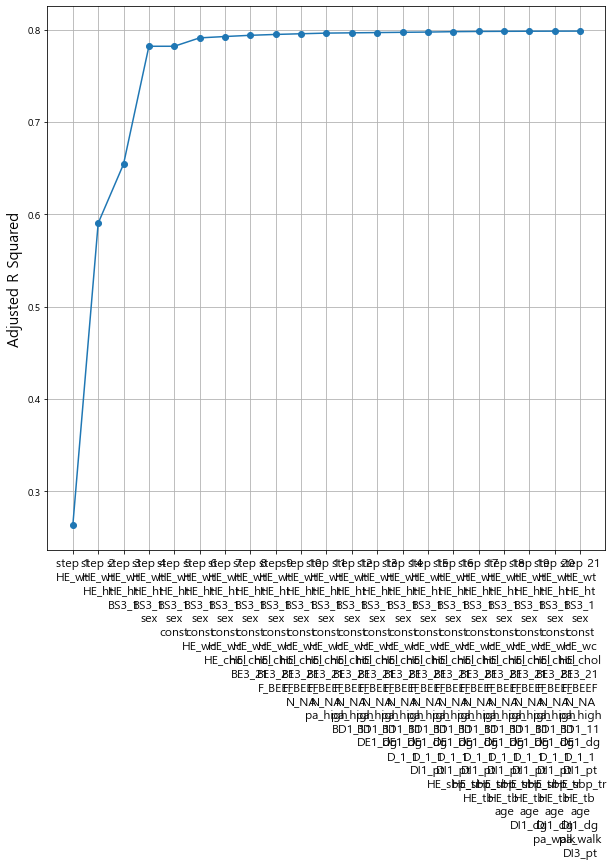

In [331]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [332]:
for i in range(len(sv_per_step)): 
    print(sv_per_step[i], adjusted_r_squared[i])

['HE_wt'] 0.2633860333011002
['HE_wt', 'HE_ht'] 0.590593348329683
['HE_wt', 'HE_ht', 'BS3_1'] 0.6545982368743951
['HE_wt', 'HE_ht', 'BS3_1', 'sex'] 0.7822095529236334
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const'] 0.7822095529236334
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const', 'HE_wc'] 0.7912960620759371
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const', 'HE_wc', 'HE_chol'] 0.7927502267247096
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const', 'HE_wc', 'HE_chol', 'BE3_21'] 0.7940834712954907
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const', 'HE_wc', 'HE_chol', 'BE3_21', 'F_BEEF'] 0.7950247837965869
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const', 'HE_wc', 'HE_chol', 'BE3_21', 'F_BEEF', 'N_NA'] 0.7957645449552859
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const', 'HE_wc', 'HE_chol', 'BE3_21', 'F_BEEF', 'N_NA', 'pa_high'] 0.7964690830557186
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const', 'HE_wc', 'HE_chol', 'BE3_21', 'F_BEEF', 'N_NA', 'pa_high', 'BD1_11'] 0.7967633834834722
['HE_wt', 'HE_ht', 'BS3_1', 'sex', 'const', 'HE_wc', '

In [333]:
# train test split - 종속변수가 총지방량일때 
# using selected variables

feature_columns = df.columns.difference(["총골밀도", "총지방량"]) # Target column 빼기
feature_columns = ['HE_wt',
 'HE_ht',
 'BS3_1',
 'sex',
 'const',
 'HE_wc',
 'HE_chol',
 'BE3_21',
 'F_BEEF',
 'N_NA',
 'pa_high',
 'BD1_11',
 'DE1_dg',
 'D_1_1',
 'DI1_pt',
 'HE_sbp_tr',
 'HE_tb',
 'age',
 'DI1_dg',
 'pa_walk',
 'DI3_pt']

X_fat = df[feature_columns]
y_fat = df.총지방량

train_x_fat, test_x_fat, train_y_fat, test_y_fat = train_test_split(X_fat,y_fat, train_size = 0.7, test_size = 0.3)

print(train_x_fat.shape, test_x_fat.shape, train_y_fat.shape, test_y_fat.shape)

(8440, 21) (3618, 21) (8440,) (3618,)


In [335]:
# X_col&지방량 OLS

model = sm.OLS(train_y_fat,train_x_fat)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총지방량   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     1633.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:03:26   Log-Likelihood:                -78134.
No. Observations:                8440   AIC:                         1.563e+05
Df Residuals:                    8419   BIC:                         1.565e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HE_wt       4969.4238     80.712     61.570      0.000    4811.209    5127.639
HE_ht      -1346.6035     59.569    -22.606      0.000   -1463.372   -1229.834
BS3_1         98.5189     38.852      2.536      0.011      22.359     174.679
sex         3528.3067     51.259     68.833      0.000    3427.826    3628.787
const       1.672e+04     40.274    415.232      0.000    1.66e+04    1.68e+04
HE_wc       1247.7315     67.927     18.369      0.000    1114.577    1380.886
HE_chol      259.6303     29.440      8.819      0.000     201.921     317.339
BE3_21      -878.4977    165.155     -5.319      0.000   -1202.241    -554.754
F_BEEF       214.3199     33.799      6.341      0.000     148.066     280.574
N_NA        -132.2869     28.311     -4.673      0.000    -187.784     -76.790
pa_high     -141.5261     28.689     -4.933      0.000    -197.764     -85.288
BD1_11       -94.0945     30.052     -3.131      0.002    -153.005     -35.184
DE1_dg       163.1541     43.034      3.791      0.000      78.798     247.510
D_1_1         98.3860     30.542      3.221      0.001      38.517     158.255
DI1_pt      -555.3200    167.862     -3.308      0.001    -884.371    -226.269
HE_sbp_tr   -100.0836     34.069     -2.938      0.003    -166.867     -33.300
HE_tb        117.0838     28.679      4.083      0.000      60.865     173.302
age         -184.7186     49.859     -3.705      0.000    -282.454     -86.983
DI1_dg       406.9262    168.484      2.415      0.016      76.656     737.196
pa_walk      -35.7314     28.154     -1.269      0.204     -90.920      19.457
DI3_pt       -25.7372     26.650     -0.966      0.334     -77.977      26.502
==============================================================================
Omnibus:                       94.344   Durbin-Watson:                   1.942
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.657
Skew:                           0.072   Prob(JB):                     2.61e-34
Kurtosis:                       3.647   Cond. No.                         15.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [342]:
# prediction

pre_y_fat=fitted_model.predict(test_x_fat)  

In [344]:
# MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y_fat, pre_y_fat)

1973.074548752653

In [375]:
# RMSE

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(test_y_fat, pre_y_fat) 
np.sqrt(MSE)

2510.285782662222

In [346]:
# r2 score

from sklearn.metrics import r2_score
r2_score(test_y_fat, pre_y_fat)

0.807233271588759

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


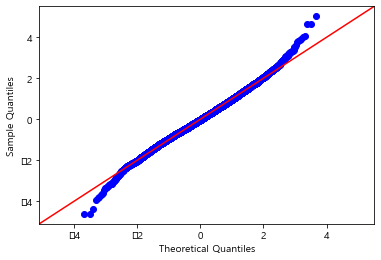

In [345]:
# 학습데이터의 잔차 확인

res = fitted_model.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

------------------

#### when Y == 총골밀도
#### stepwise selection & OLS

In [347]:
## Stepwise selection - BMI 제거

variables = df.columns[:-2].tolist() ## 설명 변수 리스트
variables.remove('HE_BMI') # BMI 제거하고
 
y = df['총골밀도'] ## 반응 변수
selected_variables = [] ## 선택된 변수들
sl_enter = 0.05
sl_remove = 0.05
 
sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder) ## 변수의 p-value
    ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
    ## 선형 모형을 적합한다.
    for col in remainder: 
        X = df[selected_variables+[col]]
        X = sm.add_constant(X)
        model = sm.OLS(y,X).fit()
        pval[col] = model.pvalues[col]
 
    min_pval = pval.min()
    if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())
        ## 선택된 변수들에대해서
        ## 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()
            if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break
        
        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-347-63374243caa9>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-347-63374243caa9>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-347-63374243caa9>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder) ## 변수의 p-value
<ipython-input-347-63374243caa9>:17: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)

In [348]:
selected_variables

['HE_wt',
 'const',
 'HE_wc',
 'sex',
 'age',
 'BD2_1',
 'BE3_21',
 'HE_HP_tr',
 'HE_chol',
 'HE_HDL_st2',
 'HE_DM',
 'HE_alt',
 'D_1_1',
 'HE_crea',
 'pa_high',
 'F_CHICK',
 'L_DN1',
 'BP1',
 'DI3_dg',
 'BD1_11',
 'pa_mid',
 'HE_ht',
 'N_NA']

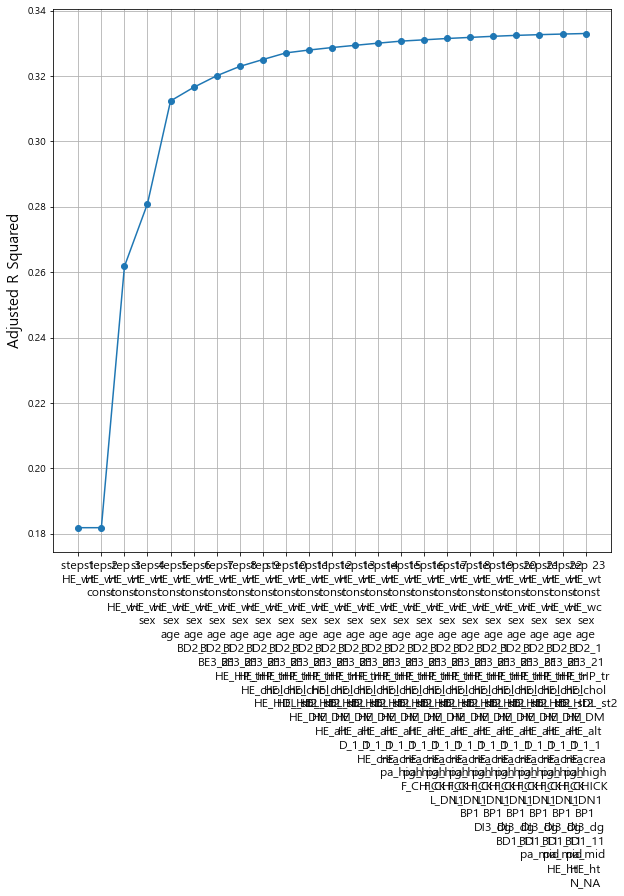

In [349]:
fig = plt.figure(figsize=(10,10))
fig.set_facecolor('white')
 
font_size = 15
plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
plt.plot(steps,adjusted_r_squared, marker='o')
    
plt.ylabel('Adjusted R Squared',fontsize=font_size)
plt.grid(True)
plt.show()

In [350]:
# train test split - 종속변수가 총골밀도일때 
# using selected variables

feature_columns = df.columns.difference(["총골밀도", "총지방량"]) # Target column 빼기
feature_columns = ['HE_wt',
 'const',
 'HE_wc',
 'sex',
 'age',
 'BD2_1',
 'BE3_21',
 'HE_HP_tr',
 'HE_chol',
 'HE_HDL_st2',
 'HE_DM',
 'HE_alt',
 'D_1_1',
 'HE_crea',
 'pa_high',
 'F_CHICK',
 'L_DN1',
 'BP1',
 'DI3_dg',
 'BD1_11',
 'pa_mid',
 'HE_ht',
 'N_NA']

X_bone = df[feature_columns]
y_bone = df.총골밀도

train_x_bone, test_x_bone, train_y_bone, test_y_bone = train_test_split(X_bone,y_bone, train_size = 0.7, test_size = 0.3)

print(train_x_bone.shape, test_x_bone.shape, train_y_bone.shape, test_y_bone.shape)

(8440, 23) (3618, 23) (8440,) (3618,)


In [351]:
# X_col&골밀도 OLS

model = sm.OLS(train_y_bone,train_x_bone)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   총골밀도   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 27 Sep 2021   Prob (F-statistic):               0.00
Time:                        17:13:10   Log-Likelihood:                 6509.8
No. Observations:                8440   AIC:                        -1.297e+04
Df Residuals:                    8417   BIC:                        -1.281e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HE_wt          0.0555      0.004     15.234      0.000       0.048       0.063
const          1.1133      0.002    493.101      0.000       1.109       1.118
HE_wc         -0.0167      0.003     -5.416      0.000      -0.023      -0.011
sex           -0.0269      0.002    -12.999      0.000      -0.031      -0.023
age           -0.0259      0.002    -11.096      0.000      -0.031      -0.021
BD2_1         -0.0074      0.001     -5.627      0.000      -0.010      -0.005
BE3_21        -0.0674      0.012     -5.564      0.000      -0.091      -0.044
HE_HP_tr      -0.0093      0.001     -6.224      0.000      -0.012      -0.006
HE_chol       -0.0084      0.001     -6.381      0.000      -0.011      -0.006
HE_HDL_st2     0.0054      0.001      4.004      0.000       0.003       0.008
HE_DM          0.0049      0.001      3.729      0.000       0.002       0.008
HE_alt        -0.0041      0.001     -3.099      0.002      -0.007      -0.002
D_1_1         -0.0025      0.001     -1.798      0.072      -0.005       0.000
HE_crea        0.0048      0.001      3.370      0.001       0.002       0.008
pa_high        0.0032      0.001      2.542      0.011       0.001       0.006
F_CHICK        0.0027      0.002      1.818      0.069      -0.000       0.006
L_DN1          0.0044      0.001      3.459      0.001       0.002       0.007
BP1            0.0040      0.002      2.152      0.031       0.000       0.008
DI3_dg         0.0024      0.001      1.993      0.046    3.92e-05       0.005
BD1_11        -0.0034      0.001     -2.530      0.011      -0.006      -0.001
pa_mid         0.0041      0.002      1.972      0.049    2.49e-05       0.008
HE_ht          0.0045      0.003      1.715      0.086      -0.001       0.010
N_NA           0.0018      0.001      1.469      0.142      -0.001       0.004
==============================================================================
Omnibus:                      384.240   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.588
Skew:                           0.484   Prob(JB):                    3.24e-104
Kurtosis:                       3.647   Cond. No.                         18.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [352]:
# prediction

pre_y_bone=fitted_model.predict(test_x_bone)  

In [354]:
# MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_y_bone, pre_y_bone)

0.08674259260900226

In [356]:
# r2 score

from sklearn.metrics import r2_score
r2_score(test_y_bone, pre_y_bone)

0.3358843196154132

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


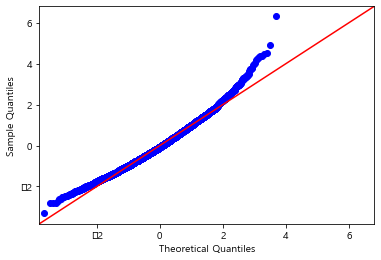

In [362]:
# 학습데이터의 잔차 확인

res = fitted_model.resid

# q-q plot을 통한 잔차의 정규분포 확인 - 꼬리를 봐야한다
fig = sm.qqplot(res,fit = True,line = '45')

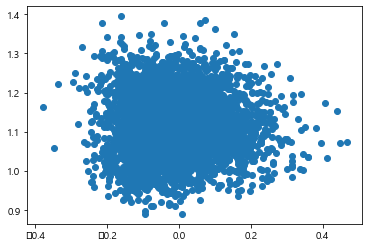

In [374]:
plt.scatter(test_y_bone - pre_y_bone,pre_y_bone)

plt.show()

---------------------------------

In [190]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

#### when Y == 총지방량 
#### backward selection & OLS

In [245]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_fat,X_fat[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_fat[list(feature_set)]) - y_fat) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [246]:
# backward selection - 총지방량

def backward(predictors):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)-1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [247]:
# 총지방량

models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X_fat.columns)))

tic = time.time()
predictors = X_fat.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  48 models on 47 predictors in 1.9028751850128174 seconds.
Processed  47 models on 46 predictors in 1.7450292110443115 seconds.
Processed  46 models on 45 predictors in 1.712444543838501 seconds.
Processed  45 models on 44 predictors in 1.6480472087860107 seconds.
Processed  44 models on 43 predictors in 1.5653717517852783 seconds.
Processed  43 models on 42 predictors in 1.4356215000152588 seconds.
Processed  42 models on 41 predictors in 1.3527979850769043 seconds.
Processed  41 models on 40 predictors in 1.2628018856048584 seconds.
Processed  40 models on 39 predictors in 1.1433184146881104 seconds.
Processed  39 models on 38 predictors in 1.114713430404663 seconds.
Processed  38 models on 37 predictors in 1.163346529006958 seconds.
Processed  37 models on 36 predictors in 1.0441956520080566 seconds.
Processed  36 models on 35 predictors in 0.9434647560119629 seconds.
Processed  35 models on 34 predictors in 0.9233856201171875 seconds.
Processed  34 models on 33 predictors

In [249]:
# variable selected

print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
DI3_dg     -3144.255136
DI3_lt    -53884.568958
HE_BMI      1772.773349
HE_chol      222.236663
HE_wc        980.293808
HE_wt       2931.749444
sex         3641.805065
dtype: float64


In [250]:
# 총지방량 선택된 변수들로 OLS

# train test split - 종속변수가 총지방량일때 

# feature_columns = df.columns.difference(["총골밀도", "총지방량"]) # Target column 빼기
feature_columns = ['DI3_dg', 'DI3_lt', 'HE_BMI', 'HE_chol', 'HE_wc', 'HE_wt', 'sex']

X_fat = df[feature_columns]
y_fat = df.총지방량

train_x_fat, test_x_fat, train_y_fat, test_y_fat = train_test_split(X_fat,y_fat, train_size = 0.7, test_size = 0.3)

print(train_x_fat.shape, test_x_fat.shape, train_y_fat.shape, test_y_fat.shape)

(8440, 7) (3618, 7) (8440,) (3618,)


In [251]:
# X_col&지방량 OLS

model = sm.OLS(train_y_fat,train_x_fat)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   총지방량   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          6.146e+04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:09:46   Log-Likelihood:                         -78164.
No. Observations:                8440   AIC:                                  1.563e+05
Df Residuals:                    8433   BIC:                                  1.564e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DI3_dg     -3113.4795     27.803   -111.985      0.000   -3167.980   -3058.979
DI3_lt     -5.388e+04     90.117   -597.843      0.000   -5.41e+04   -5.37e+04
HE_BMI      1741.1142     71.916     24.210      0.000    1600.141    1882.088
HE_chol      251.5951     28.553      8.811      0.000     195.623     307.567
HE_wc        998.5801     60.542     16.494      0.000     879.902    1117.258
HE_wt       2955.2761     65.983     44.789      0.000    2825.934    3084.619
sex         3635.2126     40.579     89.584      0.000    3555.668    3714.757
==============================================================================
Omnibus:                       98.967   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.865
Skew:                           0.050   Prob(JB):                     1.30e-37
Kurtosis:                       3.688   Cond. No.                         5.51
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-------------------------------

#### when Y == 총골밀도
#### backward selection & OLS

In [252]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_bone,X_bone[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_bone[list(feature_set)]) - y_bone) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [253]:
# 총골밀도

models_bwd = pd.DataFrame(columns=["RSS", "model"], index = range(1,len(X_bone.columns)))

tic = time.time()
predictors = X_bone.columns

while(len(predictors) > 1):  
    models_bwd.loc[len(predictors)-1] = backward(predictors)
    predictors = models_bwd.loc[len(predictors)-1]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  48 models on 47 predictors in 1.8199937343597412 seconds.
Processed  47 models on 46 predictors in 1.7044880390167236 seconds.
Processed  46 models on 45 predictors in 1.6696810722351074 seconds.
Processed  45 models on 44 predictors in 1.5515110492706299 seconds.
Processed  44 models on 43 predictors in 1.5524711608886719 seconds.
Processed  43 models on 42 predictors in 1.4365322589874268 seconds.
Processed  42 models on 41 predictors in 1.3511137962341309 seconds.
Processed  41 models on 40 predictors in 1.2622253894805908 seconds.
Processed  40 models on 39 predictors in 1.229428768157959 seconds.
Processed  39 models on 38 predictors in 1.127518892288208 seconds.
Processed  38 models on 37 predictors in 1.035740852355957 seconds.
Processed  37 models on 36 predictors in 1.0129427909851074 seconds.
Processed  36 models on 35 predictors in 0.9560306072235107 seconds.
Processed  35 models on 34 predictors in 0.9236140251159668 seconds.
Processed  34 models on 33 predictors

In [254]:
# variable selected

print("-------------------")
print("Backward Selection:")
print("-------------------")
print(models_bwd.loc[7, "model"].params)

-------------------
Backward Selection:
-------------------
BD2_1    -0.008824
DI3_dg   -0.203644
DI3_lt   -3.594865
HE_BMI    0.024567
HE_ht     0.034718
age      -0.039742
sex      -0.026600
dtype: float64


In [255]:
# 총골밀도 선택된 변수들로 OLS

# feature_columns = df.columns.difference(["총골밀도", "총지방량"]) # Target column 빼기
feature_columns = ['BD2_1', 'DI3_dg', 'DI3_lt', 'HE_BMI', 'HE_ht', 'age', 'sex']

X_bone = df[feature_columns]
y_bone = df.총골밀도

train_x_bone, test_x_bone, train_y_bone, test_y_bone = train_test_split(X_bone,y_bone, train_size = 0.7, test_size = 0.3)

print(train_x_bone.shape, test_x_bone.shape, train_y_bone.shape, test_y_bone.shape)

(8440, 7) (3618, 7) (8440,) (3618,)


In [256]:
# X_col&총골밀도 OLS

model = sm.OLS(train_y_bone,train_x_bone)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   총골밀도   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.186e+05
Date:                Mon, 27 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:13:19   Log-Likelihood:                          6439.4
No. Observations:                8440   AIC:                                 -1.286e+04
Df Residuals:                    8433   BIC:                                 -1.282e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BD2_1         -0.0091      0.001     -7.124      0.000      -0.012      -0.007
DI3_dg        -0.2052      0.001   -167.428      0.000      -0.208      -0.203
DI3_lt        -3.5930      0.004   -862.696      0.000      -3.601      -3.585
HE_BMI         0.0248      0.001     18.846      0.000       0.022       0.027
HE_ht          0.0356      0.002     16.790      0.000       0.031       0.040
age           -0.0400      0.002    -23.002      0.000      -0.043      -0.037
sex           -0.0262      0.002    -13.849      0.000      -0.030      -0.023
==============================================================================
Omnibus:                      344.298   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              417.595
Skew:                           0.458   Prob(JB):                     2.09e-91
Kurtosis:                       3.591   Cond. No.                         4.56
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------

#### when Y == 총지방량
#### forward selection & OLS

In [260]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_fat,X_fat[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_fat[list(feature_set)]) - y_fat) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [261]:
# forward selection - 총지방량

def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_fat.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [262]:
# 총지방량 forward selection

models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X_fat.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    print(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  7 models on 1 predictors in 0.03088855743408203 seconds.
[]
Processed  6 models on 2 predictors in 0.021935701370239258 seconds.
['DI3_lt']
Processed  5 models on 3 predictors in 0.021941661834716797 seconds.
['DI3_lt', 'HE_BMI']
Processed  4 models on 4 predictors in 0.018948793411254883 seconds.
['DI3_lt', 'HE_BMI', 'DI3_dg']
Processed  3 models on 5 predictors in 0.010971784591674805 seconds.
['DI3_lt', 'HE_BMI', 'DI3_dg', 'sex']
Processed  2 models on 6 predictors in 0.009974002838134766 seconds.
['DI3_lt', 'HE_BMI', 'DI3_dg', 'sex', 'HE_wt']
Processed  1 models on 7 predictors in 0.00498652458190918 seconds.
['DI3_lt', 'HE_BMI', 'DI3_dg', 'sex', 'HE_wt', 'HE_wc']
Total elapsed time: 0.13959765434265137 seconds.


In [263]:
# selected variable

print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
DI3_lt    -53884.568958
HE_BMI      1772.773349
DI3_dg     -3144.255136
sex         3641.805065
HE_wt       2931.749444
HE_wc        980.293808
HE_chol      222.236663
dtype: float64


In [264]:
# 총지방량 선택된 변수들로 OLS

# train test split - 종속변수가 총지방량일때 

# feature_columns = df.columns.difference(["총골밀도", "총지방량"]) # Target column 빼기
feature_columns = ['DI3_lt', 'HE_BMI', 'DI3_dg', 'sex', 'HE_wt', 'HE_wc', 'HE_chol']

X_fat = df[feature_columns]
y_fat = df.총지방량

train_x_fat, test_x_fat, train_y_fat, test_y_fat = train_test_split(X_fat,y_fat, train_size = 0.7, test_size = 0.3)

print(train_x_fat.shape, test_x_fat.shape, train_y_fat.shape, test_y_fat.shape)

(8440, 7) (3618, 7) (8440,) (3618,)


In [265]:
# X_col&지방량 OLS

model = sm.OLS(train_y_fat,train_x_fat)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   총지방량   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                          6.121e+04
Date:                Mon, 27 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:16:00   Log-Likelihood:                         -78193.
No. Observations:                8440   AIC:                                  1.564e+05
Df Residuals:                    8433   BIC:                                  1.565e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DI3_lt     -5.395e+04     90.283   -597.594      0.000   -5.41e+04   -5.38e+04
HE_BMI      1690.0063     72.338     23.362      0.000    1548.205    1831.807
DI3_dg     -3129.3352     26.674   -117.317      0.000   -3181.623   -3077.047
sex         3645.8871     40.625     89.745      0.000    3566.252    3725.522
HE_wt       2957.1199     66.053     44.769      0.000    2827.641    3086.599
HE_wc       1064.7491     61.325     17.362      0.000     944.537    1184.961
HE_chol      235.7130     29.018      8.123      0.000     178.831     292.596
==============================================================================
Omnibus:                       82.167   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.529
Skew:                           0.038   Prob(JB):                     6.13e-30
Kurtosis:                       3.614   Cond. No.                         5.54
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

----------------------------

#### when Y == 총골밀도
#### forward selection & OLS

In [266]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y_bone,X_bone[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X_bone[list(feature_set)]) - y_bone) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [267]:
# forward selection - 총골밀도

def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X_bone.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [268]:
# 총골밀도

models_fwd = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
predictors = []

for i in range(1,len(X_bone.columns)+1):    
    models_fwd.loc[i] = forward(predictors)
    predictors = models_fwd.loc[i]["model"].model.exog_names

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed  7 models on 1 predictors in 0.025902986526489258 seconds.
Processed  6 models on 2 predictors in 0.020943880081176758 seconds.
Processed  5 models on 3 predictors in 0.01795196533203125 seconds.
Processed  4 models on 4 predictors in 0.017952442169189453 seconds.
Processed  3 models on 5 predictors in 0.013962030410766602 seconds.
Processed  2 models on 6 predictors in 0.007978200912475586 seconds.
Processed  1 models on 7 predictors in 0.004985809326171875 seconds.
Total elapsed time: 0.12763023376464844 seconds.


In [269]:
# selected variables

print("-----------------")
print("Foward Selection:")
print("-----------------")
print(models_fwd.loc[7, "model"].params)

-----------------
Foward Selection:
-----------------
DI3_lt   -3.594865
DI3_dg   -0.203644
HE_ht     0.034718
age      -0.039742
HE_BMI    0.024567
sex      -0.026600
BD2_1    -0.008824
dtype: float64


In [270]:
# train test split - 종속변수가 총골밀도일때

# feature_columns = df.columns.difference(["총골밀도", "총지방량"]) # Target column 빼기
feature_columns = ['DI3_lt', 'DI3_dg', 'HE_ht', 'age', 'HE_BMI', 'sex', 'BD2_1']

X_bone = df[feature_columns]
y_bone = df.총골밀도

train_x_bone, test_x_bone, train_y_bone, test_y_bone = train_test_split(X_bone,y_bone, train_size = 0.7, test_size = 0.3)

print(train_x_bone.shape, test_x_bone.shape, train_y_bone.shape, test_y_bone.shape)

(8440, 7) (3618, 7) (8440,) (3618,)


In [271]:
# X_col&골밀도 OLS

model = sm.OLS(train_y_bone,train_x_bone)
fitted_model = model.fit()

fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   총골밀도   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          1.182e+05
Date:                Mon, 27 Sep 2021   Prob (F-statistic):                        0.00
Time:                        15:18:16   Log-Likelihood:                          6423.8
No. Observations:                8440   AIC:                                 -1.283e+04
Df Residuals:                    8433   BIC:                                 -1.278e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DI3_lt        -3.5922      0.004   -862.423      0.000      -3.600      -3.584
DI3_dg        -0.2034      0.001   -172.186      0.000      -0.206      -0.201
HE_ht          0.0353      0.002     16.440      0.000       0.031       0.039
age           -0.0382      0.002    -21.921      0.000      -0.042      -0.035
HE_BMI         0.0240      0.001     18.191      0.000       0.021       0.027
sex           -0.0249      0.002    -12.978      0.000      -0.029      -0.021
BD2_1         -0.0099      0.001     -7.722      0.000      -0.012      -0.007
==============================================================================
Omnibus:                      369.868   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              460.484
Skew:                           0.470   Prob(JB):                    1.02e-100
Kurtosis:                       3.654   Cond. No.                         4.55
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
# forward selection 2

# 변수선택을 통해 형성한 모델의 AIC를 구하는 함수
# AIC가 낮을 수록 모델이 좋다고 평가됨

def processSubset(X,y,feature_set):
    model = sm.OLS(y,X[list(feature_set)]) # Modeling
    regr = model.fit() # model fitting
    AIC = regr.aic # model's AIC
    return {"model" : regr, "AIC" : AIC}
    
print(processSubset(X = train_x, y = train_y, feature_set = feature_columns[0:5]))

# forward selection
def forward(X,y,predictors):

# predictor - 현재 선택되어있는 변수
# 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X,y=y,feature_set=predictors+[p]+['const']))
    
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)
    
    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ",models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print("Selected predictors:",best_model["model"].model.exog_names,"AIC: ",best_model[0])
    return best_model

ValueError: The indices for endog and exog are not aligned

In [146]:
# VIF를 통한 다중공선성 확인

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns
vif

,VIF Factor,features
0,7.205583,const
1,1.789615,age
2,50.451564,HE_ht
3,116.865538,HE_wt
4,71.308898,HE_BMI
5,1.918835,HE_sbp_tr
6,1.969182,HE_dbp_tr
7,1.189674,HE_Upro
8,2.317262,HE_HbA1c
9,2.399390,HE_glu


C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


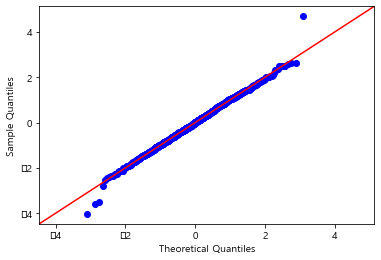

In [147]:
# 학습데이터의 잔차 확인

res = fitted_model.resid

# q-q plot을 통한 잔차의 정규분포 확인
fig = sm.qqplot(res,fit = True,line = '45')

Text(0, 0.5, 'Residual')

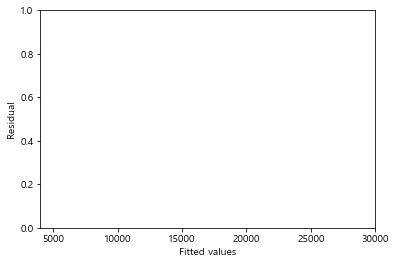

In [148]:
# 잔차패턴 확인

pred_y = fitted_model.predict(train_x)

import matplotlib.pyplot as plt 

plt.xlim(4000,30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


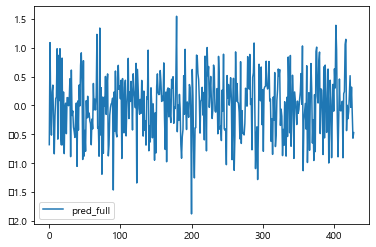

In [149]:
# 검증데이터에 대한 예측

pred_y2 = fitted_model.predict(test_x)

# 예측데이터 잔차

plt.plot(np.array(test_y - pred_y2), label = "pred_full")
plt.legend()
plt.show()

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


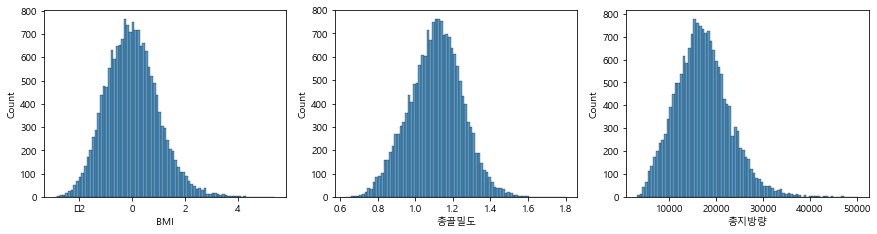

In [31]:
# 분포 확인

plt.figure(figsize=(20,20))
for idx,col in enumerate(df.columns.tolist()[1:]):
    plt.subplot(5,4,idx+1)
    sns.histplot(df[col])
    #plt.grid()
plt.show()

In [112]:
X_col

['age',
 'HE_ht',
 'HE_wt',
 'HE_BMI',
 'HE_sbp_tr',
 'HE_dbp_tr',
 'HE_Upro',
 'HE_HbA1c',
 'HE_glu',
 'HE_chol',
 'HE_wc',
 'HE_HDL_st2',
 'HE_crea']

In [113]:
# 독립변수 종속변수 설정
# expr = """BB_COUNT ~ DAY  + DAY_OF_WEEK + MONTH + HIGH_T + LOW_T + PRECIP"""

expr = """총골밀도 ~ age+
 HE_ht+
 HE_wt+
 HE_BMI+
 HE_sbp_tr+
 HE_dbp_tr+
 HE_Upro+
 HE_HbA1c+
 HE_glu+
 HE_chol+
 HE_wc+
 HE_HDL_st2+
 HE_crea """

In [114]:
# y_train, X_train = dmatrices(expr, df_train, return_type='dataframe')
# y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

In [120]:
y_train.isna().sum()

총골밀도    0
dtype: int64

In [119]:
X_train.isna().sum()

Intercept     0
age           0
HE_ht         0
HE_wt         0
HE_BMI        0
HE_sbp_tr     0
HE_dbp_tr     0
HE_Upro       0
HE_HbA1c      0
HE_glu        0
HE_chol       0
HE_wc         0
HE_HDL_st2    0
HE_crea       0
dtype: int64

In [142]:
# X_col & 골밀도 Poisson Regression

poisson_training_results = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit(method="lbfgs")

C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [143]:
print(poisson_training_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   총골밀도   No. Observations:                 1144
Model:                            GLM   Df Residuals:                     1130
Model Family:                 Poisson   Df Model:                           13
Link Function:                    log   Scale:                          1.0000
Method:                         lbfgs   Log-Likelihood:                 3250.2
Date:                Fri, 24 Sep 2021   Deviance:                       47465.
Time:                        15:12:06   Pearson chi2:                 4.23e+18
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2869      0.102    -61.764      0.0

In [125]:
# predictions

poisson_predictions = poisson_training_results.get_prediction(X_test)
#summary_frame() returns a pandas DataFrame
predictions_summary_frame = poisson_predictions.summary_frame()
print(predictions_summary_frame)

              mean       mean_se  mean_ci_lower  mean_ci_upper
1     6.292555e-07  1.651714e-07   3.761817e-07   1.052583e-06
2     1.962809e-05  6.459573e-06   1.029791e-05   3.741167e-05
8     5.785243e-09  1.570308e-09   3.398421e-09   9.848411e-09
11    4.836413e-06  1.974815e-06   2.172495e-06   1.076683e-05
12    5.224047e-10  2.298025e-10   2.205814e-10   1.237215e-09
...            ...           ...            ...            ...
1398  2.278381e-07  6.612028e-08   1.290035e-07   4.023938e-07
1403  1.436862e-07  4.043262e-08   8.277347e-08   2.494246e-07
1404  2.998623e-06  4.840320e-07   2.185357e-06   4.114539e-06
1415  4.341193e-06  6.414287e-07   3.249680e-06   5.799326e-06
1418  8.719745e-09  3.902528e-09   3.627003e-09   2.096330e-08

[284 rows x 4 columns]


In [126]:
predictions_summary_frame

,mean,mean_se,mean_ci_lower,mean_ci_upper
1,6.292555e-07,1.651714e-07,3.761817e-07,1.052583e-06
2,1.962809e-05,6.459573e-06,1.029791e-05,3.741167e-05
8,5.785243e-09,1.570308e-09,3.398421e-09,9.848411e-09
11,4.836413e-06,1.974815e-06,2.172495e-06,1.076683e-05
12,5.224047e-10,2.298025e-10,2.205814e-10,1.237215e-09
...,...,...,...,...
1398,2.278381e-07,6.612028e-08,1.290035e-07,4.023938e-07
1403,1.436862e-07,4.043262e-08,8.277347e-08,2.494246e-07
1404,2.998623e-06,4.840320e-07,2.185357e-06,4.114539e-06
1415,4.341193e-06,6.414287e-07,3.249680e-06,5.799326e-06


In [127]:
predicted_counts=predictions_summary_frame['mean']
actual_counts = y_test['총골밀도']

In [128]:
actual_counts

1       0.254198
2       0.097344
8      -1.268423
11     -0.053500
12     -1.159753
          ...   
1398   -0.035070
1403    0.937271
1404   -0.283980
1415    1.194210
1418    0.728727
Name: 총골밀도, Length: 284, dtype: float64

In [129]:
# MAE

from sklearn.metrics import mean_absolute_error
mean_absolute_error(actual_counts, predicted_counts)

1.7955038075527838

In [130]:
# MSE

from sklearn.metrics import mean_squared_error 
mean_squared_error(actual_counts, predicted_counts)

184.63662295191037

In [131]:
# RMSE

from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(actual_counts, predicted_counts) 
np.sqrt(MSE)

13.588105936881357